# Проектная работа по анализу KIWA

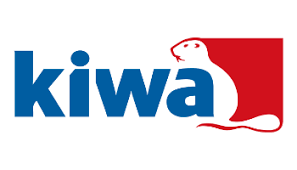

## Задачи исследоания и контекст проекта

Краудфандинговая платформа kiva.org ставит своей целью предоставление финансовых услуг наиболее нуждающимся и необеспеченным людям. Заёмщики оставляют заявку на сайте, доноры поддерживают её  финансово, на месте партнёр организации выдаёт кредит, который погашается из этих средств, которые донорам возвращаются уже заёмщиками через платформу.

Представленный компанией датасет за 2014-2017гг. содержит информацию о займах на различные проекты в 85 разных странах.

Целью настоящего исследования является выявление факторов, влияющих на скорость сборов средств. В результате мы сможем выявить те характеристики каждого займа, которые мотивируют доноров с большей готовностью жертвовать организации.

## План выполнения работ

1. Подготовка
    * Импорт библиотек
    * Загрузка и обзор данных

2. Очистка и подготовка данных  
   * Заполнение пропусков
   *  Преобразование столбцов в подходящие типы данных.
   * Удаление лишних столбцов
   *  Добавление новых столбцов
   *  Изучение распределения данных и выбросы
   * Добавление новых колонок - пол заемщиков и число представителей каждого пола
   * Добавление нового столбца с информацие поуровню бедности

3. Исследовательский анализ данных:
  *  Матрицы корреляций
  * Влияние суммы кредита на сроки выплат
  * Зависимость между сроками выплат и числом доноров
  * Влияние сектора и назначения займа на сроки выплат
  * Пол, число заемщиков и срокивыплат
  * Связб между временем возврата и сроками выплат
  * Связь между религией страны и сроками выплат
  * Связь между нтрвалами выплат и скоростью сбора средств
  * Взаимосвязь между страной, регионом, уровнем бедности и скоростью сборов средства Проанализируйте распределение времени сбора средст
  * Влияние уровня достатка страны на скорость сбора одного доллара
  
4. Статистический анализ данных

5. Выводы
  


### 1.1 Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
!pip install phik
import phik
from scipy import stats as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.4 MB/s eta 0:00:00


In [2]:
# сводный индекс бедности
mpi_index = {
 'Afghanistan':0.27172124, 'Albania':0.00274788, 'Algeria':0.0054091, 'Angola':0.28243506, 'Argentina':0.0014693,
 'Armenia':0.000690069007857107, 'Azerbaijan':0.021,'Bangladesh':0.1040603, 'Belize':0.01710883, 'Benin':0.36767483,
 'Bolivia':0.0377543, 'Botswana':0.0726387, 'Burundi':0.408861094240289,
 'Cameroon':0.2320601, 'Central African Republic':0.4613475, 'Chad':0.5170112, 'Chile':0.207, 'Colombia':0.01965727,
 'Congo':0.3311887, 'Costa Rica':0.0020063, 'Cote D\'Ivoire':0.235871,
 'Cuba':0.0026887, 'Dominican Republic':0.0087862, 'Ecuador':0.0079374, 'Ethiopia':0.3666042, 'Gambia':0.1980231,
 'Georgia':0.0012446, 'Ghana':0.1112183, 'Guinea':0.3732216, 'Guinea-Bissau':0.3406887, 'Guyana':0.0065924,
 'Haiti':0.1995877, 'Honduras':0.0511542, 'India':0.0688106, 'Indonesia':0.0140107, 'Iraq':0.03269432,
 'Israel':None,'Jamaica':0.0108103, 'Jordan':0.00152592, 'Kiribati':0.0801574, 'Kyrgyzstan':0.001426,
 'Lao People\'s Democratic Republic':0.10833325, 'Lebanon':0.531,'Lesotho':0.0843592, 'Liberia':0.2592937, 'Madagascar':0.3839745,
 'Malawi':0.2310952, 'Maldives':0.00265409, 'Mali':0.3760629, 'Mauritania':0.3270372, 'Mexico':0.0280538,
 'Mongolia':0.0281268, 'Montenegro':0.0048989, 'Morocco':0.0266967, 'Myanmar (Burma)':0.17584623, 'Nepal':0.0743989,
 'Nigeria':0.2543896, 'North Macedonia':0.0014221, 'Pakistan':0.1982474, 'Palestine':0.0019801, 'Panama':0.191,
 'Papua New Guinea':0.2632909, 'Paraguay':0.01884858, 'Peru':0.0292211, 'Philippines':0.02424934, 'Rwanda':0.231002,
 'Samoa':0.0246005, 'Sao Tome and Principe':0.0479234, 'Senegal':0.262862, 'Serbia':0.0004331, 'Seychelles':0.0029635,
 'Sierra Leone':0.2928993, 'Somalia':0.514,'South Africa':0.02489064, 'Sri Lanka':0.0111847, 'Suriname':0.0112325,
 'Tajikistan':0.02900592, 'Tanzania':0.284179310669258, 'Thailand':0.0021207, 'Timor-Leste':0.221514240070676,
 'Togo':0.1796163, 'Tonga':0.0033362, 'Tunisia':0.0028877, 'Turkmenistan':0.0008492, 'Turkey':0.028,
 'Tuvalu':0.0080846, 'Uganda':0.281028478426768, 'Vietnam':0.0077294, 'Zambia':0.2316851, 'Zimbabwe':0.1099418,
 'Barbados':0.00852886, 'Bhutan':0.17486399, 'Bosnia and Herzegovina':0.0083075, 'Brazil':0.01634604,
 'Burkina Faso':0.523424279357662, 'Cambodia':0.17034812, 'China':0.0160667, 'Comoros':0.18077141,
 'The Democratic Republic of the Congo':0.1116763,
 'Egypt':0.0196817970481763, 'El Salvador':0.03246251, 'Eswatini (Kingdom of)':0.08127132, 'Gabon':0.0696953622816103,
 'Guatemala':0.13351782, 'Kazakhstan':0.00161063266199911, 'Kenya':0.170776074964141, 'Libya':0.00742146512493491,
 'Moldova':0.00353391, 'Mozambique':0.416955412151251, 'Namibia':0.184734534885262,
 'Nicaragua':0.0744948916698962, 'Niger':0.601279812220296, 'Saint Lucia':0.00720186, 'South Sudan':0.58015746,
 'Sudan':0.2794396, 'Trinidad and Tobago':0.00241792, 'Vanuatu':0.129,'Ukraine':0.000840431758839254,
 'Yemen':0.245166461457986 }


In [3]:
def lookup(df:pd.DataFrame) -> None:
    '''Функция для получения базовой информации о датафрейме'''
    print('Dataset shape',df.shape,"example:")
    display(df.dropna().sample().T)
    for col in df.columns:
        n = df[col].nunique()
        if n < 15:
            display(df[col].value_counts(dropna=False).to_frame().T.style.format("{:_.0f}"))
        elif np.issubdtype(df[col].dtype, np.number):
            print(f"{col} — {n} values. Min {df[col].min():_.0f}, avg: {df[col].mean():_.1f}, max: {df[col].max():_.0f}")
        else:
            print(f"{col} — {n} values. Min {df[col].dropna().min()}, max: {df[col].dropna().max()}")

### 1.2 Загрузка и обзор данных

In [4]:
df = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/RTWuCdqaqU30yQ')
df.sample()



,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,main_country_religion
53948,707954,200.0,200.0,Motorcycle Transport,Transportation,to cover the cost of motorcycle maintenance.,PH,Philippines,"Jimenez, Misamis Occidental",PHP,...,2014-05-09 08:41:43+00:00,2014-04-11 07:00:00+00:00,2014-05-18 11:51:53+00:00,14.0,7,NaN,male,monthly,2014-05-09,Christians


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622633 entries, 0 to 622632
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     622633 non-null  int64  
 1   funded_amount          622633 non-null  float64
 2   loan_amount            622633 non-null  float64
 3   activity               622633 non-null  object 
 4   sector                 622633 non-null  object 
 5   use                    619310 non-null  object 
 6   country_code           622625 non-null  object 
 7   country                622633 non-null  object 
 8   region                 574127 non-null  object 
 9   currency               622633 non-null  object 
 10  partner_id             611522 non-null  float64
 11  posted_time            622633 non-null  object 
 12  disbursed_time         622633 non-null  object 
 13  funded_time            622633 non-null  object 
 14  term_in_months         622633 non-nu

In [6]:
# исследуем датасет
lookup(df)

Dataset shape (622633, 21) example:


,404141
id,1077891
funded_amount,125.0
loan_amount,125.0
activity,Charcoal Sales
sector,Retail
use,to buy 15 bags of charcoal.
country_code,TG
country,Togo
region,Adidogomé
currency,XOF


id — 622633 values. Min 653_047, avg: 990_100.5, max: 1_340_316
funded_amount — 475 values. Min 25, avg: 798.3, max: 100_000
loan_amount — 475 values. Min 25, avg: 798.3, max: 100_000
activity — 163 values. Min Adult Care, max: Wholesale
sector — 15 values. Min Agriculture, max: Wholesale
use — 391213 values. Min To buy chicken., max: ” provide a safer and more secure living environment for his family by allowing him to purchase new windows for his home through an affordable loan.
country_code — 84 values. Min AF, max: ZW
country — 85 values. Min Afghanistan, max: Zimbabwe
region — 12359 values. Min "The first May" village, max: İZMİT
currency — 67 values. Min ALL, max: ZWD
partner_id — 363 values. Min 9, avg: 178.5, max: 535
posted_time — 619611 values. Min 2014-01-01 04:49:26+00:00, max: 2017-07-25 06:14:08+00:00
disbursed_time — 5698 values. Min 2013-12-02 08:00:00+00:00, max: 2017-09-28 07:00:00+00:00
funded_time — 497853 values. Min 2014-01-01 12:18:55+00:00, max: 2017-07-26 0

,monthly,irregular,bullet,weekly
repayment_interval,311_560,250_376,60_095,602


date — 1296 values. Min 2014-01-01, max: 2017-07-25


,Christians,Muslims,Buddhists,Hindus,Folk Religions,Jews,Unaffiliated
main_country_religion,463_343,99_881,37_578,11_628,9_880,190,133


#### Обзор данных

В нашем распоряжении датасет за 2014-2017гг, содержащий информацию о займах на различные проекты в 85 разных странах.

Суммы займа варьируются от 25  до 100 000, среднее значение - 798.3
В датасете хрансится информация о секторе заявки, всего 15 секторов, а также есть более детальная информация о займе. Колонка activity хранит информацию о сфере применения займа (163 уникальных значения), а колонка use наиболее подробно описываем цель займа (391213)

Колонка region хранит информацию о регионе внутри страны. Мы в дальнейшем эту информацию использовать не будем, так как для нас важнее объединить страны в небольшое количество регионов на карте мира, регионы внутри страны для нашего исследования испольщоваться не будут.

В датасете 4 колонки, указывающие на время события: posted_time - время публиации на сайте; disbursed_time - время выдачи средств; funded_time - время, когда средства собраны; date - в дальнейшем, нам предстоит разобраться, о какой дате идет речь

Датасет также хранит важную для нас колонку borrower_genders. В ней через запятую указано, заемщики какого пола получилали средства. В дальнейшем мы сможем испольозвать эту инфоримацию для подсчета количества мужчин, женщин, а также общего количества заемщиков.




## Очистка и подготовка данных

### 2.1 Заполнение пропусков

In [7]:
df.isna().sum()

id                            0
funded_amount                 0
loan_amount                   0
activity                      0
sector                        0
use                        3323
country_code                  8
country                       0
region                    48506
currency                      0
partner_id                11111
posted_time                   0
disbursed_time                0
funded_time                   0
term_in_months                0
lender_count                  0
tags                     167915
borrower_genders           3318
repayment_interval            0
date                          0
main_country_religion         0
dtype: int64

В датафрейме есть пропуски в 6 столбцах.

 Пропущенные значения в столцах use, tags, country_code, region, partner_id, borrower_genders.

1) В колонках со строковыми значениями мы заменим все пропуски на 'unknown', так как у нас нет достоверной информации, на что нам этипропуски заменить.

2) Country_code - посмотрим, о какой стране идет речь

3) Пропуски в partner_id - заменим на 0, так как реальные id начинается с 9

In [8]:
for col in ['use', 'tags', 'borrower_genders', 'region']:
  df[col] = df[col].fillna('unknown')

In [9]:
list(df.query('country_code.isna()')['country'])


['Namibia',
 'Namibia',
 'Namibia',
 'Namibia',
 'Namibia',
 'Namibia',
 'Namibia',
 'Namibia']

Все пропуски кода страны у страны Намибия. Заменим их на Na

In [10]:
df['country_code'] = df['country_code'].fillna('Na')

### 2.2 Преобрузуем тип значений колонок

In [11]:
df['partner_id']= df['partner_id'].fillna(0).astype('int')

Мы заменили пропущенные значения ид партнеров на 0 и преобразовали все номера в int

In [12]:
for a in ['posted_time', 'disbursed_time', 'funded_time']:
  df[a] = pd.to_datetime(df[a])

In [13]:
df.query('funded_amount  != loan_amount ')

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,main_country_religion


Мы видим, что суммы 'funded_amount" всегда равны 'loan_amount", убираем ненужную колонку 'loan_amount'

### 2.3 Удаляем ненужные столбцы датафрейма

In [14]:
df_copy = df.copy(deep=True)

In [15]:
df_copy['date1'] = df_copy['posted_time'].dt.date
df_copy[['date1', 'date']] = df_copy[['date1', 'date']].astype('str')
df_copy.query('date1 != date')

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,main_country_religion,date1


In [16]:
df = df.drop(columns = ['date', 'currency', 'loan_amount'])

На тестовом датафрейме мы проверили, что колонка 'date' - всегда совпадает с датой 'posted_time'. Мы ее удалили, чтобы сократь количество ненужных колонок в датафрейме
Мы также удалили колонку 'cuurency', так как она не понадобятся для нашего исследования

In [17]:
df.duplicated().sum()

0

### 2.4 Изучим столбцы времени и добавим новые колонки

In [18]:
print(f"Заемщики получают деньги до публикации на сайте в  {len(df.query('posted_time > disbursed_time'))} случаях, это {len(df.query('posted_time > disbursed_time'))/len(df):.2%} от всех займов")
print(f"Заемщики получают  деньги до публикации на сайте после публикации в {len(df.query('posted_time < disbursed_time'))} случаях и это {(len(df.query('posted_time < disbursed_time'))/len(df)):.2%}от всех займов")

Заемщики получают деньги до публикации на сайте в  580478 случаях, это 93.23% от всех займов
Заемщики получают  деньги до публикации на сайте после публикации в 42155 случаях и это 6.77%от всех займов


Мы видим, что в большинстве случаев (93.23%, это 580478 из 622633) заемщики получают деньги до публикации на сайте

Добавим четыре новых столбца

1) hours_to_fund количество часов от публикации до времени, когда все средства уже собраны

2) days_to_fund количество дней от публикации до времени, когда все средства уже собраны(мы считаем не по дате а по количеству часов, разделенному на 24)

2) days_to post - количество дней от выплат до публикации на сайте. Если значение будетотрицательным - это будет означать, что информация сначала появилась на сайте, итолько потом была поизведена выплата

4) hours_one_usd - время в часах для сборов одного доллара

In [19]:
df['hours_to_fund'] = (df['funded_time']- df['posted_time'])/np.timedelta64(1, 'h')
df['days_to_fund'] = df['hours_to_fund']/24
df['days_to_post'] = (df['posted_time'] - df['disbursed_time']).dt.days
df['hours_one_usd'] = df['hours_to_fund']/df['funded_amount']
df[['posted_time','funded_time', 'hours_to_fund', 'hours_one_usd']].sample(4)

,posted_time,funded_time,hours_to_fund,hours_one_usd
321238,2015-12-07 17:21:58+00:00,2016-01-24 23:13:17+00:00,1157.855278,0.115786
436155,2016-08-03 10:06:10+00:00,2016-09-09 14:02:25+00:00,891.937500,1.274196
235851,2015-06-07 06:52:35+00:00,2015-06-10 14:02:23+00:00,79.163333,0.079163
610120,2017-06-06 09:07:01+00:00,2017-06-23 12:50:59+00:00,411.732778,1.029332


### 2.5 Распределения количественных переменных и выбросы

Изучим распределения важных для исследования количественных переменных

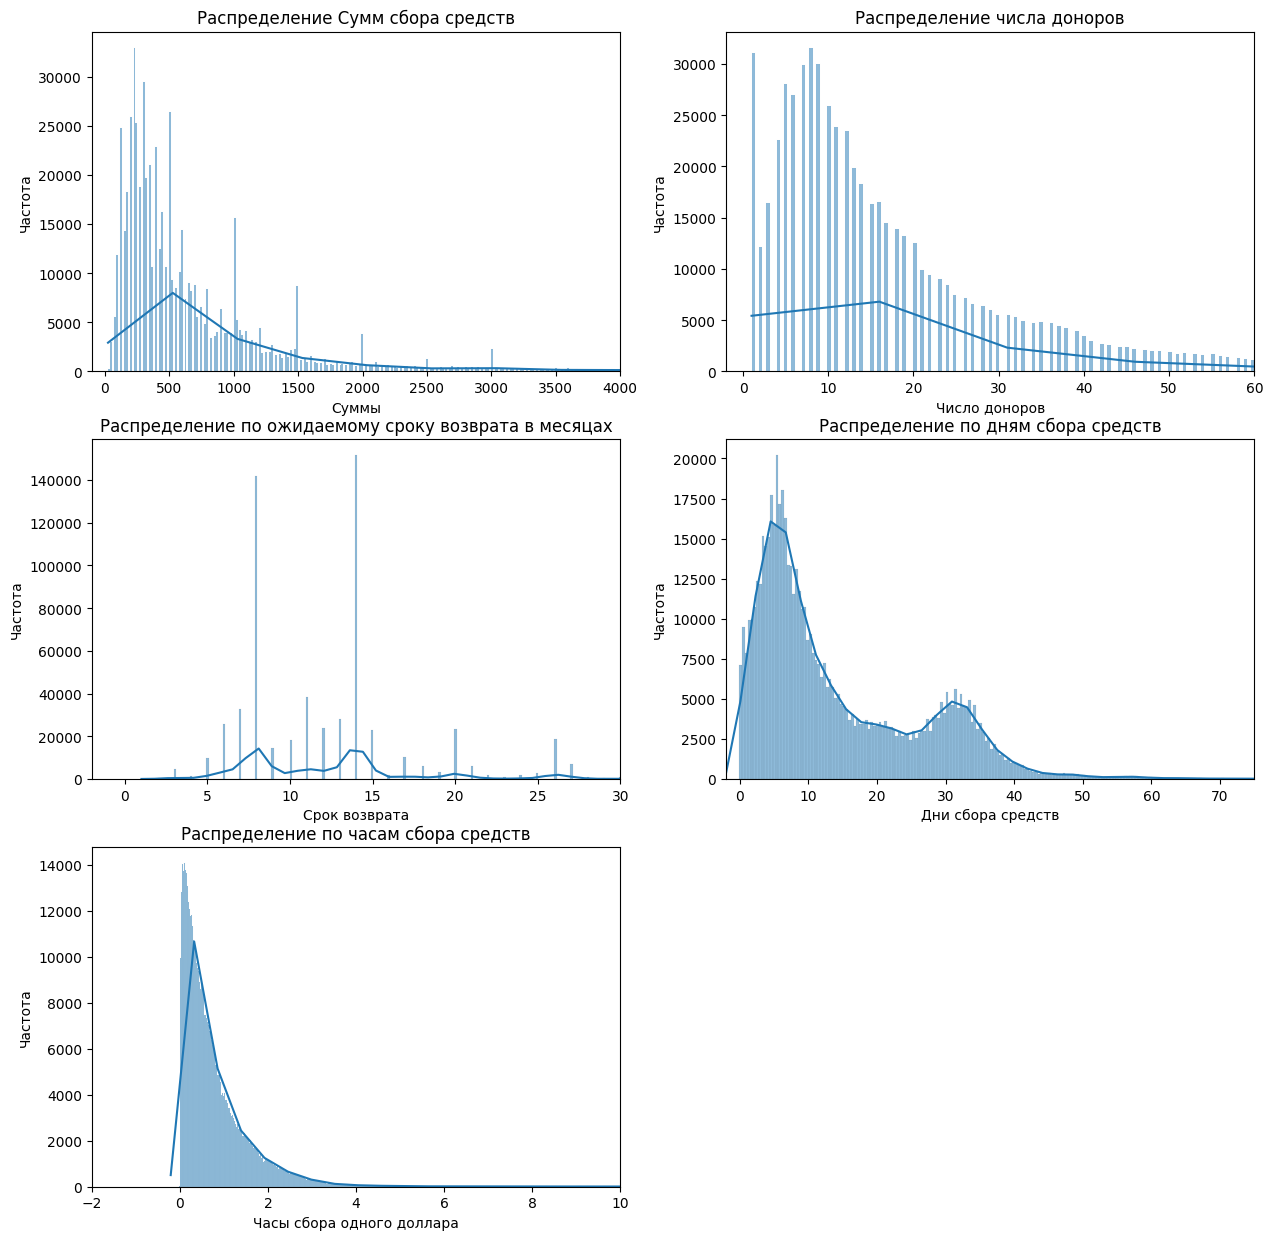

In [20]:
plt.figure(figsize=(15, 15))
ax1 = plt.subplot(3, 2, 1)
sns.histplot(df, x = 'funded_amount', kde = True, ax = ax1)
plt.xlim(-100, 4000) # ограничиваем ось X
plt.xlabel('Суммы')
plt.ylabel('Частота')
plt.title('Распределение Сумм сбора средств')


ax2 = plt.subplot(3, 2, 2)
sns.histplot(df, x = 'lender_count', kde = True, ax = ax2)
plt.xlim(-2, 60) # ограничиваем ось X
plt.xlabel('Число доноров')
plt.ylabel('Частота')
plt.title('Распределение числа доноров')


ax3 = plt.subplot(3, 2, 3)
sns.histplot(df, x = 'term_in_months', kde = True, ax = ax3)
plt.xlim(-2, 30) # ограничиваем ось X
plt.xlabel('Срок возврата')
plt.ylabel('Частота')
plt.title('Распределение по ожидаемому сроку возврата в месяцах')


ax4 = plt.subplot(3, 2, 4)
sns.histplot(df, x = 'days_to_fund', kde = True, ax = ax4)
plt.xlim(-2, 75) # ограничиваем ось X
plt.xlabel('Дни сбора средств')
plt.ylabel('Частота')
plt.title('Распределение по дням сбора средств')



ax5 = plt.subplot(3, 2, 5)
sns.histplot(df, x = 'hours_one_usd', kde = True, ax = ax5)
plt.xlim(-2, 10) # ограничиваем ось X
plt.xlabel('Часы сбора одного доллара')
plt.ylabel('Частота')
plt.title('Распределение по часам сбора средств')

plt.show()


Во всех столцах присутствуют большие выбросы.  Рассмотрим распределение каждой из меременных, ограничив выбросы.
Интересно, что очень часто заемщики планируют вернуть средства через 8 или через 14 месяцев.

In [21]:
df[['funded_amount','term_in_months','lender_count', 'hours_to_fund', 'hours_one_usd']].describe()



,funded_amount,term_in_months,lender_count,hours_to_fund,hours_one_usd
count,622633.000000,622633.000000,622633.000000,622633.000000,622633.000000
mean,798.340074,13.393465,21.029737,350.745749,0.842847
std,1149.978814,8.523262,29.081922,342.079384,1.736150
min,25.000000,1.000000,1.000000,-420.126667,-0.210063
25%,250.000000,8.000000,7.000000,124.155278,0.228432
50%,450.000000,12.000000,13.000000,230.063333,0.527148
75%,900.000000,14.000000,25.000000,540.424167,1.044781
max,100000.000000,158.000000,2986.000000,10093.758333,105.713667


Учитывая, что у нас есть много аномально больших значений, будем больше доверять показателям медианы.

* Самое частотное количество доноров от 7 до 25, значения медианы - 13
* Обычно сумма займа клеблется от 250 до 900, медиана - 450
* Обычно ожидаемый период возврата займа колеблется от 8 до 14 месяцев. Медиана - 12 месяцев.
* Чаще всего информация появляется на сайте через 7- 26 дней после выплаты.Медиана - 16 дней.

### 2.6 Изучим категориальные переменные и добавим новые колонки

**Изучим пол заемщиков***

Изучим, какие значения входят в столбец borrower_genders, нет ли ошибок в написании

In [22]:
df['borrower_genders'].unique()

array(['female', 'female, female', 'female, female, female', ...,
       'female, female, male, female, female, female, female, female, female, female, female, female, female, female, female, female, male, female, female, male, female, female, male, female, female',
       'female, female, male, female, female, female, female, female, female, female, female, female, male, female, female, male',
       'female, female, female, female, male, male, female, female, female, female, female, female'],
      dtype=object)

In [23]:
b = []
for x in df['borrower_genders'].unique():
  for y in list(set(x.replace(' ','').split(','))):
    if y not in b:
      b.append(y)
b

['female', 'male', 'unknown']

Ошибок нет. Узнаем количество женщин и мужчин в каждой заявке, а также создадим колонки с указанием группы по полу ('female', 'male, 'mixed'). Мы также добавим колонку с количество всех заемщиков

In [24]:
df['female_num'] = df['borrower_genders'].apply(lambda x:  x.replace(' ','').split(',').count('female'))
df['male_num'] = df['borrower_genders'].apply(lambda x:  x.replace(' ','').split(',').count('male'))

Напишем функция для формирования группы по полу (муэчины, женщины и смешанная группа)

In [25]:
def gender_type(row):
   if row['female_num'] > 0 and row['male_num'] > 0:
    return 'mixed'
   elif row['female_num'] > 0 and row['male_num'] == 0:
    return 'female'
   elif row['female_num'] == 0 and row['male_num'] > 0:
    return 'male'
   else:
    return 'unknown'

In [26]:
df['gen_type'] = df.apply(gender_type, axis=1)
df['borrowers_num'] = df['male_num'] + df['female_num']
df.sample()

,id,funded_amount,activity,sector,use,country_code,country,region,partner_id,posted_time,...,repayment_interval,main_country_religion,hours_to_fund,days_to_fund,days_to_post,hours_one_usd,female_num,male_num,gen_type,borrowers_num
320860,991203,300.0,Clothing Sales,Clothing,"to purchase merchandise such as blouses, skirt...",SV,El Salvador,unknown,167,2015-12-07 21:59:51+00:00,...,monthly,Christians,801.076111,33.378171,20,2.670254,0,1,male,1


Мы также добавим еще одну колонку, в которой расчитаем число часов для сбора 1 доллара. Таким образом мы будем в дальнейшем изучать не только скорость сбора всей суммы, но и сравнивать разные заяки по скорости сбора одного доллара

In [27]:
df['hours_one_usd'] = df['hours_to_fund']/df['funded_amount']

### 2.7 Добавим новые колонки с информацией по уровню бедности

In [28]:
len(mpi_index.keys())

119

Проверим, совпадает ли написание стран в нашем датафрейме с написанием стран в словаре

In [29]:
list_country= list(df['country'].unique())
list_c = list(mpi_index.keys())
b = []
for x in list_country:
  if x not in list_c:
    b.append(x)
b

['United States',
 'Kosovo',
 'Saint Vincent and the Grenadines',
 'Solomon Islands',
 'Puerto Rico']

Этих стран нет в словаре, поэтому для них мы не сможем добавить индекс бедности. Мы также не сможемдобавить Израиль,так как у нео индекс бедности None

In [30]:
df['mpi_index'] = df['country'].apply(lambda x: mpi_index.get(x))
df.sample()

,id,funded_amount,activity,sector,use,country_code,country,region,partner_id,posted_time,...,main_country_religion,hours_to_fund,days_to_fund,days_to_post,hours_one_usd,female_num,male_num,gen_type,borrowers_num,mpi_index
292259,960295,275.0,Pigs,Agriculture,to purchase feed and other supplies to raise h...,PH,Philippines,"Calatrava, Negros Occidental",145,2015-10-09 03:45:59+00:00,...,Christians,430.099167,17.920799,27,1.563997,1,0,female,1,0.024249


#### Результаты предобработки данных

1. В датафрейме были пропуски в 6 столбцах (use, tags, country_code, region, partner_id, borrower_genders). В колонках со строковыми значениями ('use', 'tags', 'borrower_genders', 'region') мы заменим все пропуски на 'unknown', так как у нас нет достоверной информации, на что нам этипропуски заменить.

2. В колонке Country_code - мы заменилизначение на Na, так как страна, у которой был пропуск в коде была Намибия

3. Пропуски в partner_id  мы заменили на 0, так как реальные id начинается с 9. Мы также преобразовали значение в int

4. Мы обнаружили, что funded_amount всегда равно loan_amount и удалили одну лишнюю колонку

5. Мы преобразовали формат из строкового в формат времени в колонках posted_time', 'disbursed_time', 'funded_time

6. Мы убдились что колонка date - дата, извлеченная из колонки posted_time, мы удалили эту колонку, так как она дублирует уже имеющуюся информацию

7. Мы убедились, что в датафрейме нет дублей

8. Мы убедились, что в большинстве случаев заемщики получают средства до публикации на сайте

9. Мы создали 4 новых столбца
hours_to_fund количество часво от публикации до времени, когда все средства уже собраны
days_to_fund количество дней от публикации до времени, когда все средства уже собраны(мы считаем не по дате а по количеству часов, разделенному на 24)
days_to post - количество дней от выплат до публикации на сайте. Если значение будет отрицательным - это будет означать, что информация сначала появилась на сайте, итолько потом была поизведена выплата
hours_one_usd - время сборов одного доллара указанной суммы



10. В трех столбцах  - 'lender_count', 'funded_amount', 'terms_in month' и 'hours_to_fund' большие выбросы. Мы уже ранее наблюдали, что минимальные значения близки к 0, но не 0. Выбросы му удалять не будем, однако, в исследовании будем больше доверять значениям медианы

11. Мы обнаружили, что чаще всего от публикациина сайте до полного сбора средств проходит от 5 до 22 дней. Медиана - 9 дней. Есть отрицательные значения (деньги были собраны до публикации на сайте). Есть аномально долгие периоды сбора средств (до 420 дней)

12. Мы изучили, какие значения входя в колонку borrower_genders. (Проверили, что нет ошибок в написании, средизначений были только male, female и unknown)
Мы создали 5 колонок:

* 'female_num' - число женщин
* 'male_num' - число мужчин
* 'borrowers_num' - число всех заемщиков
* 'gen_type' - пол заемщиков. Мы разбили на 3 категории - male, feamle, mixed
* 'hours_one_usd' - поделилиобще количество часов сбора средств на сумму

13. Мы обогатили наш датасет информацией об 'mpi_index' тех стран, которые присутствовали в словаре mpi индекса

## Исследовательский анализ

Мы уже ранее создали столбец days_to_fund и hours_to_fund, в котором мы рассматривали количество дней и часов от публикации на сайте до сбора средств

Проанализируем распределение времени сбора средств


In [31]:
df['days_to_fund'].describe()

count    622633.000000
mean         14.614406
std          14.253308
min         -17.505278
25%           5.173137
50%           9.585972
75%          22.517674
max         420.573264
Name: days_to_fund, dtype: float64

Мы видим, что из-за больших выбросов медиана вдвое отличается от средних значений. Чаще всего средства собирались в диапозоне от 5 до 22 дней, медианное значение - 9 дней.

Определим также средние значения

### 3.1 Построиим матрицу корреляций

Определим факторы, которые могут повлиять на скорость сбора средств
Это может быть  сумма кредита, сектор, деятельность, партнер или страна.

In [34]:
df_notnum = df[['activity', 'sector', 'country', 'region', 'repayment_interval', 'main_country_religion', 'hours_to_fund','gen_type', 'hours_one_usd', 'funded_amount']]

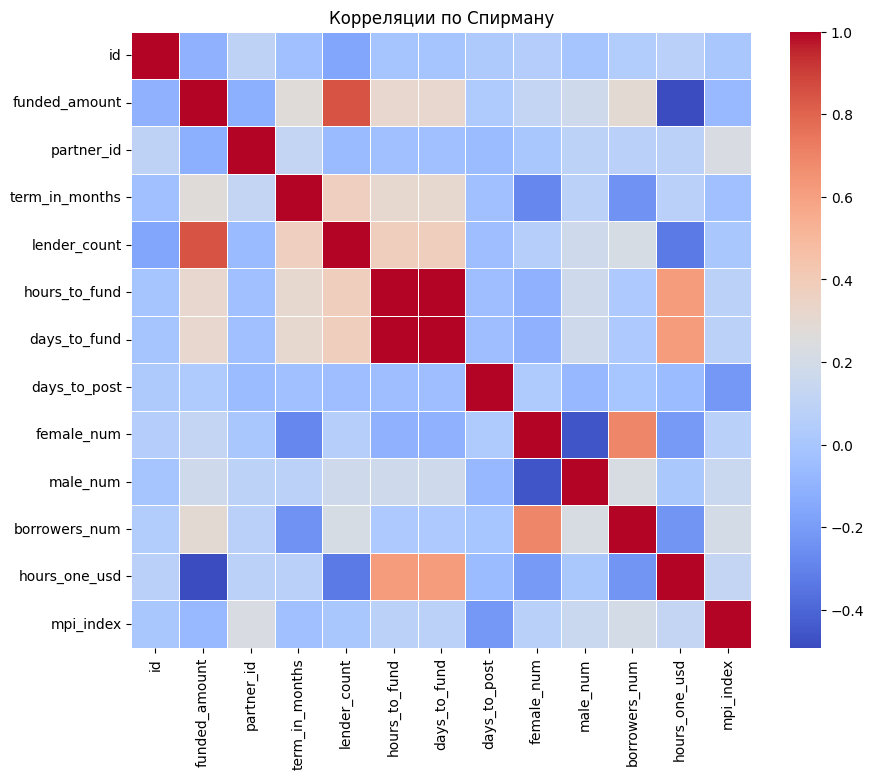

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(np.number).corr(method='spearman'), cmap='coolwarm',  linewidths=0.5).set(title='Корреляции по Спирману')
plt.show()

In [35]:
df_notnum.sample()

,activity,sector,country,region,repayment_interval,main_country_religion,hours_to_fund,gen_type,hours_one_usd,funded_amount
221374,Services,Services,Philippines,"Puerto Princesa North, Palawan",irregular,Christians,180.520833,female,0.288833,625.0


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable region is large: 12360. Are you sure this is not an interval variable? Analysis for pairs of variables including region can be slow.
  warnings.warn(


Text(0.5, 1.0, 'Phi-k Correlation Matrix Heatmap')

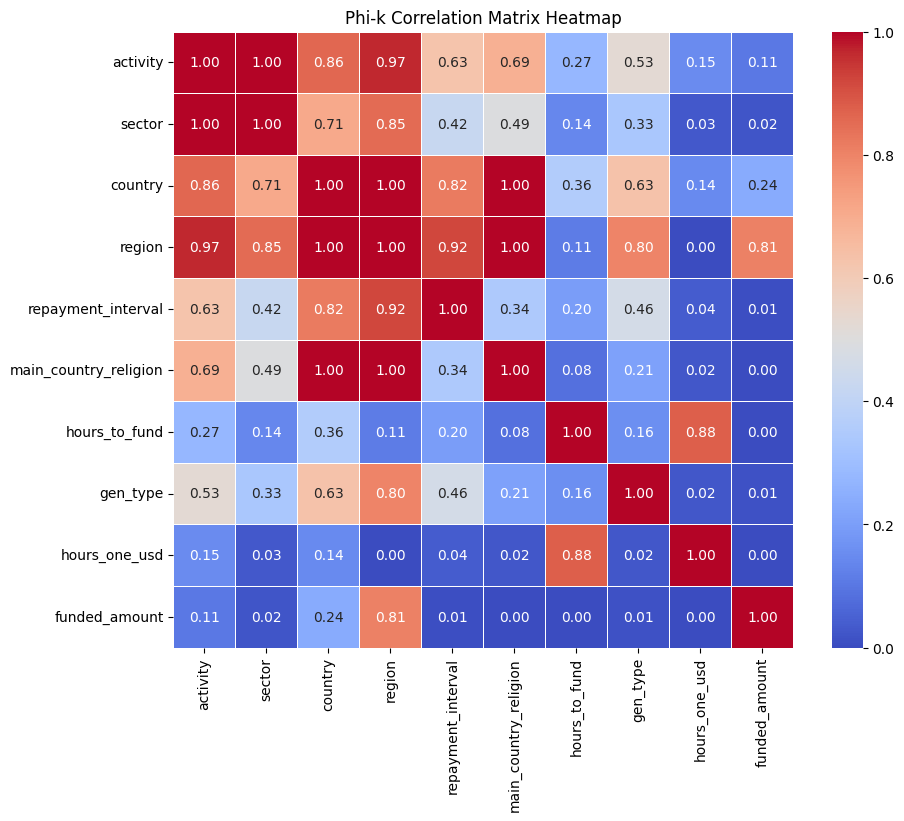

In [36]:
phik_matrix = df_notnum.phik_matrix(interval_cols=['hours_to_fund', 'hours_one_usd', 'funded_amount'])
plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Phi-k Correlation Matrix Heatmap')

Мы построили матрицу корреляций phikk, которая отображает зависимость между категориальными переменными.

Укажем некоторые категории, наиболее сильно скоррелированные с показателем времени сбора всей суммы и временем сбора одного доллара

**Страна**
Корреляция  с временем набора суммы - 36%
Корреляция с временем набора одного доллара - 14 %

Все остальные признаки коррелируют только с временем набора всей суммы

**Activity**
Корреляция с временем набора всей суммы 27%

**Сектор**
Корреляция с временем набора всей суммы 14 %

**repayment interval**
Корреляция с временем наборса всей суммы 20%

**gen_type**
Корреляция с временем набоа всей суммы - 16%

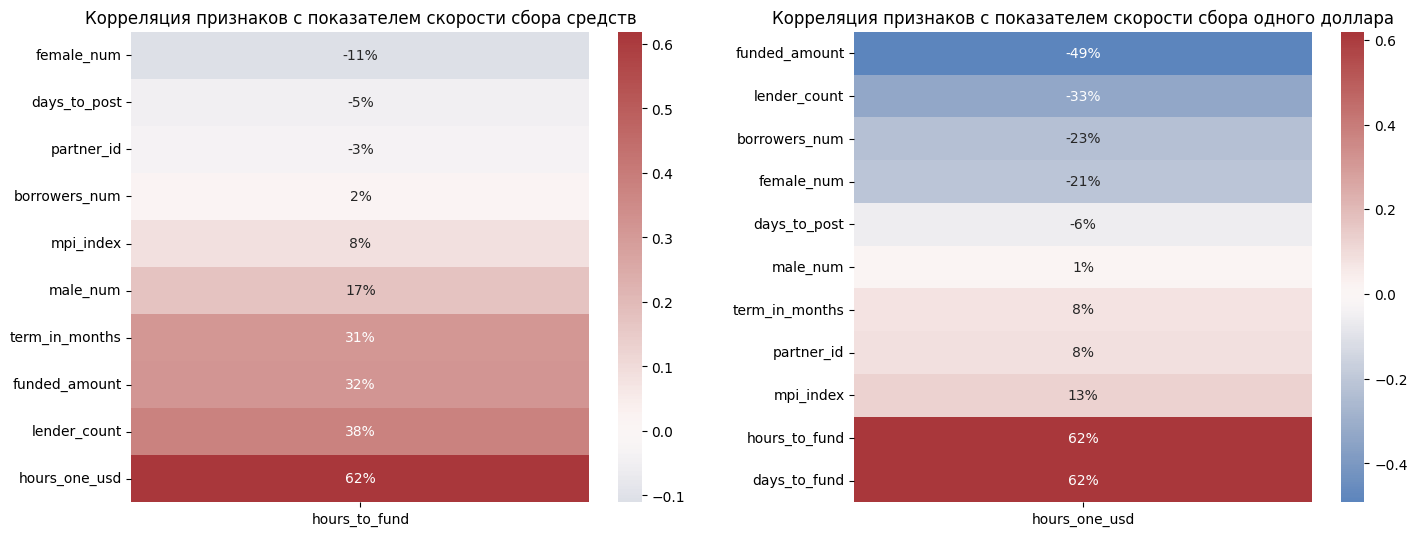

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


sns.heatmap(
    df.select_dtypes(np.number).corr(method='spearman').loc[:, ['hours_to_fund']].drop(['days_to_fund', 'id', 'hours_to_fund'])
    .sort_values('hours_to_fund'), annot=True, fmt='.0%', cmap='vlag', center=0, ax=axes[0])
axes[0].set_title('Корреляция признаков с показателем скорости сбора средств')

sns.heatmap(
    df.select_dtypes(np.number).corr(method='spearman').loc[:, ['hours_one_usd']].drop(['hours_one_usd', 'id'])
    .sort_values('hours_one_usd'), annot=True, fmt='.0%', cmap='vlag', center=0, ax=axes[1])
axes[1].set_title('Корреляция признаков с показателем скорости сбора одного доллара')

plt.tight_layout(pad=3)
plt.show()

Мы построили две матрицы корреляций Спирмана, отображающие влияние признаков на скорость сборов всей суммы и скорость сбора одного доллара

Мы можем выявить некоторые закономерности:

* Мы видим умеренную корреляцию между скоростью сбора всей суммы и скоростью сбора одного доллара - (корреляция 62%).

Рассмотрим, что есть общего и что есть различного на этих графиках

**Число доноров**
* Корреляция со скоростью сбора всей суммы  -  38%.
* Корреляция со скоростью сбора одного доллара - обратная корреляция - 49%

**Сумма займа**
* Сумма займа и время сбора всей суммы -  корреляция 32%
* Сумма займа и время сбора одного доллара  -  обратная корреляция - 49 %

**Планируемые сроки выплат**
* Срок выплат в месяце и время сбора всей суммы - корреляция 31 %
* Срок выплат и время  сбора одного доллара - корреляция 8%

**Число мужчин**
* Число мужчин и сроки выплат всей суммы - корреляция 17%
* Число мужчин и сроки выплат одого доллара - корреляция практически отсутсвует, 1 %

**Индекс mpi**
* Индекс и скорость сбора средств - корреляция 8%
* Индекс и скорость сбора одного доллара - 13%


**Число женщин**
* Число женщин и и скорость сбора всей суммы  - обратная корреляция - 11 %
* Число женщин и и скорость сбора одного доллара  - обратная корреляция - 21 %  

**Число заемщиков**
* Практически отсутсвует корреляция со сроком выплаты всей суммы
* Обратная корреляция со скоростью выплат одного доллара  - 33%



####**Выводы и наблюдения**

Мы наблюдаем достаточно заметную корреляцию двух признаков - скорости набора всей суммы и скорости набора одного доллара - **62%**
Таким образом, у популярных заявок(независимо от их суммы) набираются быстро как вся сумма так и один доллар. У непопулярных заявок(независимо от суммы) и деньги, иодин доллар набираются медленно.


Мы также видим, что число доноров часто возрастает при больших суммах. (Это логично - чем дольше заявка в базе тем больше доноров успевают внести средства)
Обратная кореляция со скоростью набора одного доллара достаточно любопытна.  Чем дольше собираетсяя один доллар тем меньше участвует в сборах доноров.
Таким образом, непопулярные заявки привлекают внимание меньшего количества людей и наоборот.

Еще одна интересная особенность - заметная обратная корредяция суммы и скорости набора одного доллара. Обратная корреляция **- 49%** Таким образом, в заяках на большие суммы один доллар собирается быстрее, чем в заявках на меньшие суммы. Сами по себе запрашиваемые суммы  не должны влиять на готовность или неготовность жертвовать. И нам не кажется логичным, что увеличение суммы больше мотивирует доноров участвовать в проекте.

Одна из возможных гипотез такого явления, это то, что доноры часто принимают участие в проектах их стран. Таким образом, заяка на маленькую сумму в бедной стране часто привлекает внимание доноров из этой же страны, которые жертвуют не очень большие суммы. Заявка на ту же сумму в богатой стране чаще привлечет внимание доноров из этой же страны. Таким образом 1 доллар в богатой стране собирается быстрее, чем в бедной.

Мы также обратили внимание, что есть достаточно много признаков, коррелирующих со скоростью набора всей суммы но не коррелирующие со скорсостью набора одного доллара. К таким признакам относятся: сектор, activity, repayment interval и группа по полу.

**Выводы**

В настоящий момент мы не можем ограничиться анализом только одного признака, описывающего скорость набор средств и готовность доноров участвовать в проекте

Так, анализируя скорость набора одного доллара мы можем говорить о факторах, влияющих на привлекательность/не привлекательность проекта в рамках одной страны. В другой, более богатой стране, один доллар может набираться быстрее не из-за большего соучастия доноров, а из-за того, что большая лоля участвующих доноров богаче.

С другой стороны, учитывая факторы, влияющие на скорость набора всей суммы, мы можем не учесть определяющего влияния самой суммы, а не привлекательности или не привлекательности проекта.

Мы построили матрицу корреляций phikk, которая отображает зависимость между категориальными переменными.

Укажем некоторые категории, наиболее сильно скоррелированные с показателем времени сбора всей суммы и временем сбора одного доллара

**Страна**
Корреляция  с временем набора суммы - 36%
Корреляция с временем набора одного доллара - 14 %

Все остальные признаки коррелируют только с временем набора всей суммы

**Activity**
Корреляция с временем набора всей суммы 27%

**Сектор**
Корреляция с временем набора всей суммы 14 %

**repayment interval**
Корреляция с временем наборса всей суммы 20%

**gen_type**
Корреляция с временем набоа всей суммы - 16%

### 3.2 Рассмотрим, как влияет сумма кредита на сроки выплаты.

In [37]:
def paired_kde(df, hue1, l1, l11, l2, l22, title1, title2):
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))
  sns.kdeplot(data = df, hue= hue1, x = 'hours_to_fund', common_norm = False, ax=axes[0]).set(title=title1)
  plt.ylabel("Плотность распределения")
  plt.xlabel("Часов до сбора средств")
  axes[0].set_xlim(l1, l11)

  sns.kdeplot(data = df, hue= hue1, x = 'hours_one_usd', common_norm = False, ax=axes[1]).set(title= title2)
  plt.ylabel("Плотность распределения")
  plt.xlabel("Часов до сбора одного доллара")
  axes[1].set_xlim(l2, l22)
  plt.show()

Мы написали функцию, котрая рисует kde графики

In [38]:
df['fund_am_group'] = pd.qcut(x=df['funded_amount'], q = 4).astype('str')

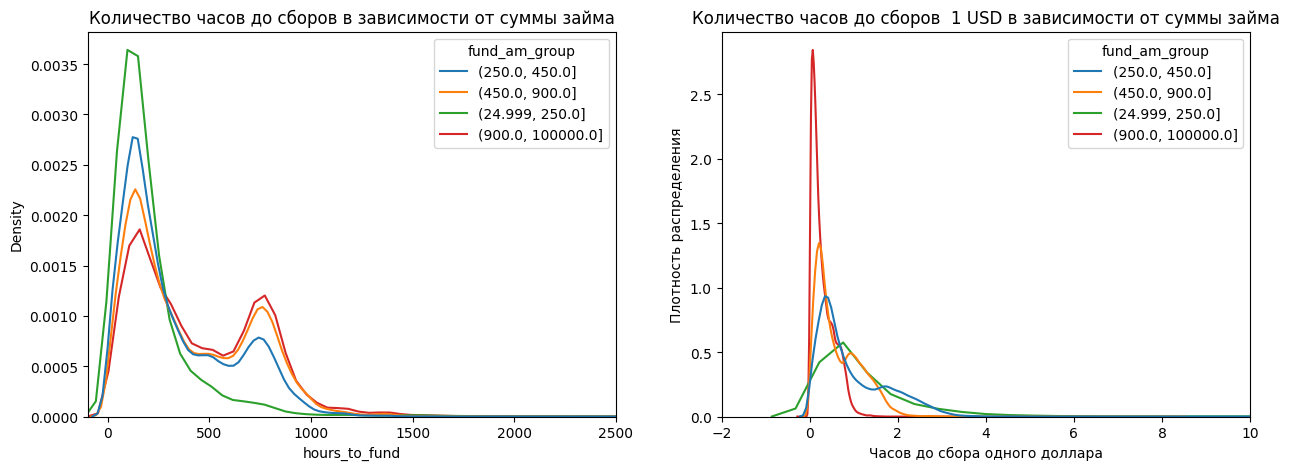

In [ ]:
paired_kde(df, 'fund_am_group', -100, 2500, -2, 10,'Количество часов до сборов в зависимости от суммы займа', 'Количество часов до сборов  1 USD в зависимости от суммы займа')

На основании этого графика мы можем видеть, что часто  сбор средств на небольшие суммы проходит быстрее, нежели на большие суммы займа.

А вот сбор одного доллара, наоборот, происходи быстрее в заявках на большие суммы

###  3.3 Зависимость между сроками выплат и числом доноров

In [39]:
df['lenders_num'] = pd.qcut(x=df['lender_count'], q = 4).astype('str')

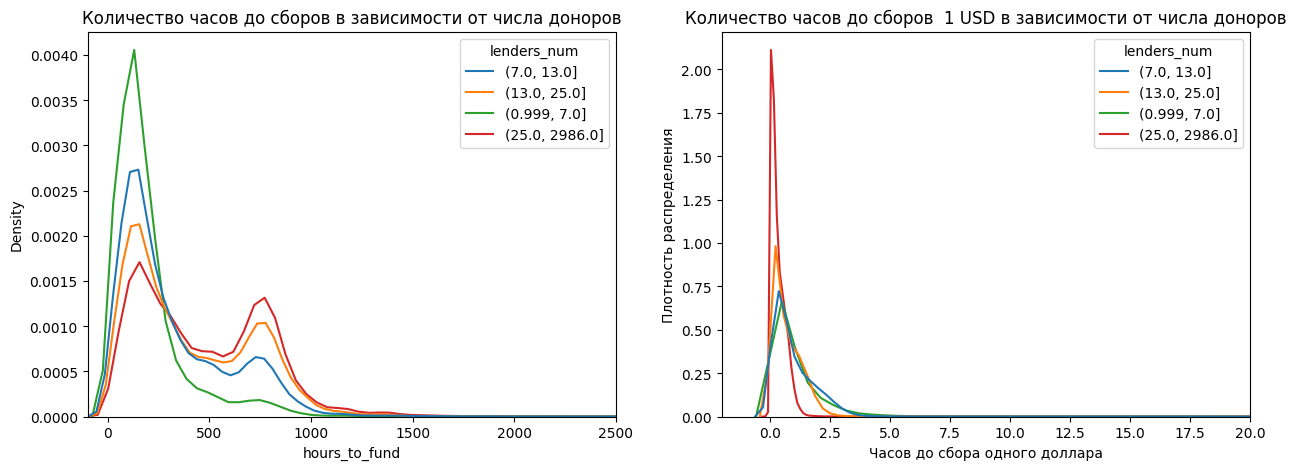

In [ ]:
paired_kde(df, 'lenders_num', -100, 2500, -2, 20,'Количество часов до сборов в зависимости от числа доноров', 'Количество часов до сборов  1 USD в зависимости от числа доноров')

Мы видим, что обычно те заявки, которые обрабатываются дольше также набирают большее количество доноров

Мы также видим, что у тех заявок, у которых один доллар набирается быстрее, число доноров обычно больше.

### 3.4 Рассмотрим, как влияет сектор на сроки выплаты.

In [40]:
new_tab = pd.crosstab(pd.qcut(x=df['days_to_fund'], q = 4).astype('str'), df['sector'], normalize='index')


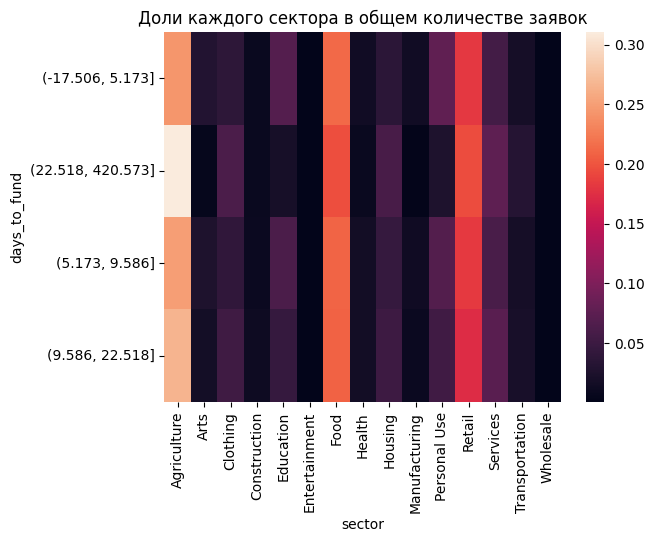

In [ ]:
sns.heatmap(new_tab).set(title='Доли каждого сектора в общем количестве заявок')
plt.show()

Мы видим, что было очень много заявок из сектора сельское хозяйство, срок сбора больше 22 дней в основном.

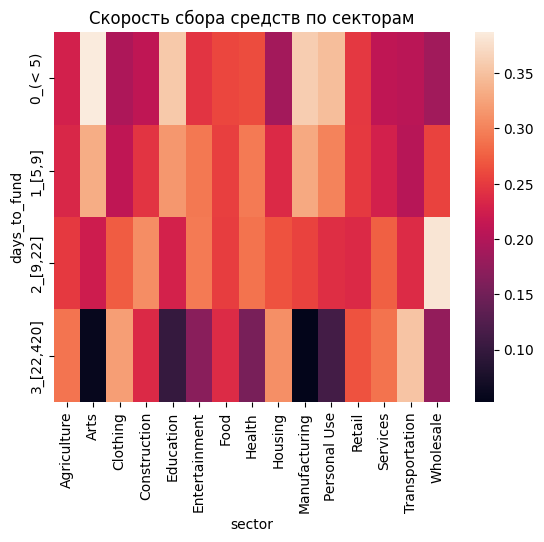

In [ ]:
new_tab = (pd.crosstab(pd.qcut(x=df['days_to_fund'],
                        q = 4, labels=['0_(< 5)', '1_[5,9]', '2_[9,22]', '3_[22,420]'])
                       .astype('str'), df['sector'], normalize='columns')

)
sns.heatmap(new_tab).set(title = 'Скорость сбора средств по секторам')
plt.show()


Быстрее всего деньги (вся сумма) собираются на искусство, образование и производство

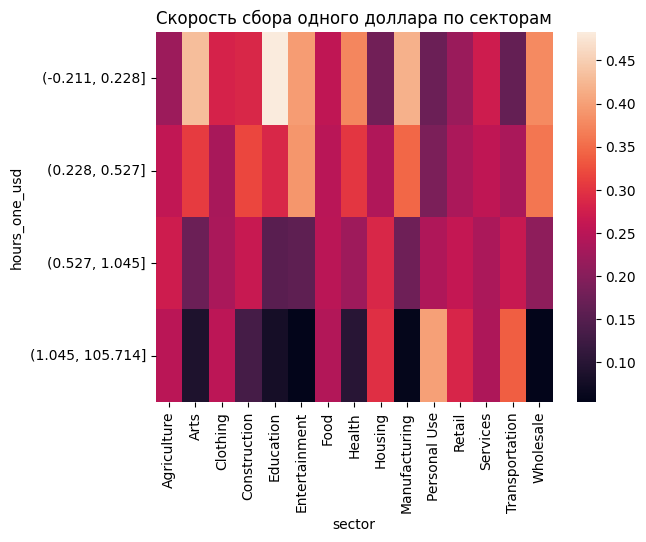

In [ ]:
new_tab = (pd.crosstab(pd.qcut(x=df['hours_one_usd'],
                        q = 4)
                       .astype('str'), df['sector'], normalize='columns')

)
sns.heatmap(new_tab).set(title = 'Скорость сбора одного доллара по секторам')
plt.show()

Выводы похожи Быстрее всего деньги (один доллар) собираются на искусство, образование и производство. В данном случае именно образование вызывает большую готовность доноров участвовать

In [41]:
mean_amount = df['hours_to_fund'].mean()
mean_usd = df['hours_one_usd'].mean()

In [133]:
def paired_barplot(df, col, ylab, sbool, title1, title2):
  df1_1 = df.groupby(col).agg({'hours_to_fund':'median'}).reset_index().sort_values(by = 'hours_to_fund', ascending = sbool).head(10)
  df1_2 = df.groupby(col).agg({'hours_one_usd':'median'}).reset_index().sort_values(by = 'hours_one_usd', ascending = sbool ).head(10)
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))
  sns.barplot(
    data = df1_1, x = 'hours_to_fund', y = col, palette='viridis', ax=axes[0])
  axes[0].set_title(title1)
  axes[0].set_xlabel('время в часах')
  axes[0].set_ylabel(ylab)
  axes[0].axvline(x=mean_amount, color='black', linestyle='--', label='Средний срок сбора средств в часах')
  axes[0].legend()

  sns.barplot(
    data = df1_2, x = 'hours_one_usd', y = col, palette='Wistia', ax=axes[1])
  axes[1].set_title(title2)
  axes[1].set_xlabel('время в часах')
  axes[1].set_ylabel(ylab)
  axes[1].axvline(x= mean_usd, color='black', linestyle='--', label='Средний срок сбора доллара в часах')
  axes[1].legend()
  plt.tight_layout(pad=3)
  plt.show()

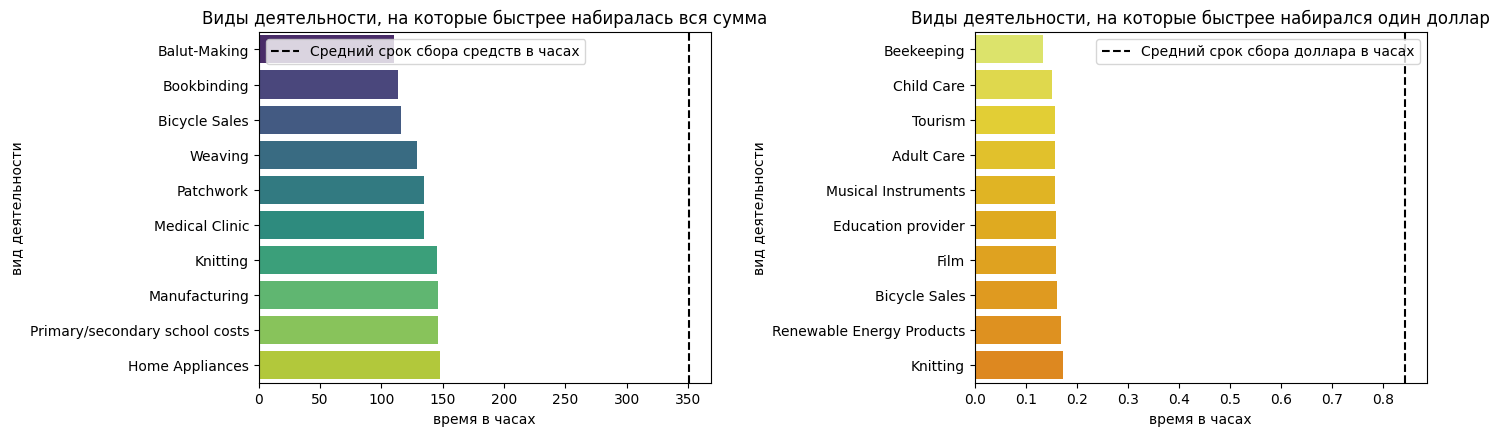

In [134]:
paired_barplot(df, 'activity', 'вид деятельности', True, 'Виды деятельности, на которые быстрее набиралась вся сумма', 'Виды деятельности, на которые быстрее набирался один доллар')

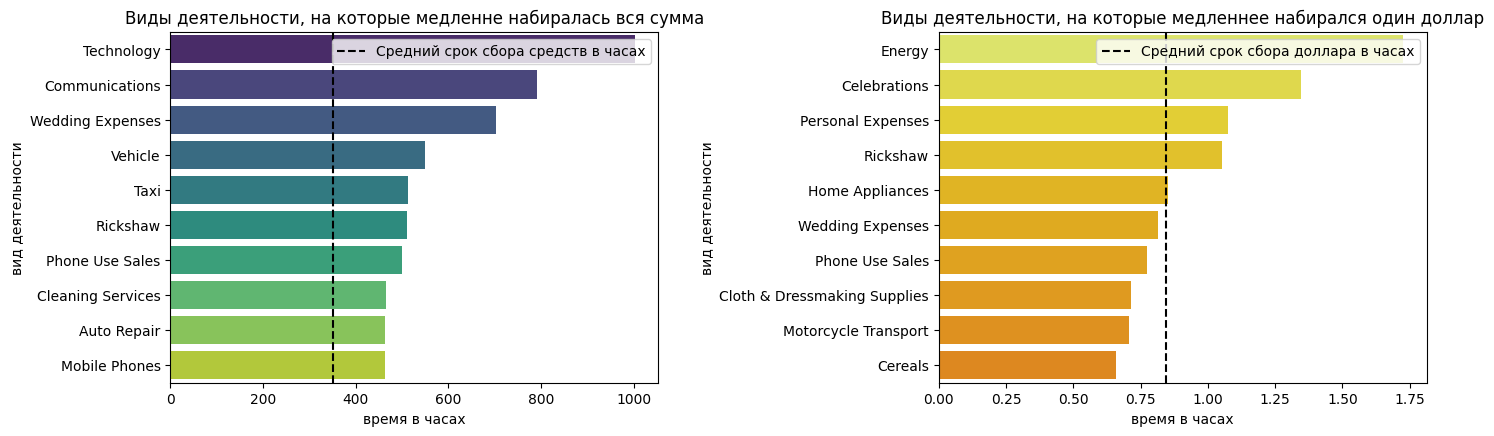

In [135]:
paired_barplot(df, 'activity', 'вид деятельности', False, 'Виды деятельности, на которые медленне набиралась вся сумма', 'Виды деятельности, на которые медленнее набирался один доллар')

Вся суммы набирается быстрее в тех случаях, когда род деятельности это - петчворк,  книжный переплет, ткачество.

Один доллар набирается быстрее для таких видов деятельности как 'Уход за взрослыми/пожилыми', 'туризм', 'забота о детях', 'Образование'

Не зависимо от того, что мы определяем под скоростью сбора средств, деньги собираются быстро для вязания    

Вся сумма набирается медленно для таких видов деятельности как технологии, коммуникации,  свадьбы
Один долларнабирается медленно для таких видов деятельности как энергетика, праздники, личные нужды


### 3.5 Как связаны между собой пол заемщиков, количество заемщиков и сроки сбора средств

In [43]:
count = df.groupby('gen_type').agg({'id':'nunique'}).reset_index()

In [44]:
def make_pie(data, labels, title):
  colors = sns.color_palette('pastel')[0:5]
  plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
  plt.title(title)
  plt.show()


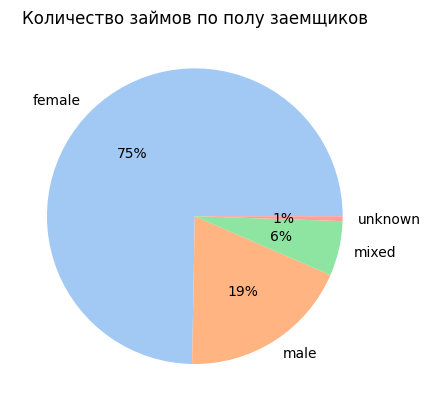

In [45]:
make_pie(count['id'], count['gen_type'], 'Количество займов по полу заемщиков')

Чаще всего (75% случаев) за займом обращаются женщины

In [46]:
count_bor = df.groupby('borrowers_num').agg({'id':'nunique'}).reset_index().sort_values(by = 'id',ascending = False)

In [47]:
print(f" Максимальное число заемщиков - {count_bor['borrowers_num'].max()}")
print(f"Самая распространенная группа - 1 человек, таких случаев {int(count_bor.query('borrowers_num == 1')['id']/count_bor['id'].sum()*100)} %")


 Максимальное число заемщиков - 50
Самая распространенная группа - 1 человек, таких случаев 83 %


Создадим несколко групп по числу заемщиков - 1 человек, 2, 3, 4-5, 6-10, >10)

In [ ]:
len(df.query('borrowers_num == 0'))

3318

In [48]:
df['bor_gr'] = (pd.cut(x=df.query('borrowers_num!=0')['borrowers_num'],
                  bins=[0,1,2,5,10,50], labels = ['1','2', '3-5', '6-10', '11-50']))
count_bor= (df.groupby('bor_gr')
          .agg({'id':'nunique'})
         .reset_index()
         .rename(columns = {'id':'num'})
)
count_bor['bor_gr'] = count_bor['bor_gr'].astype('str')

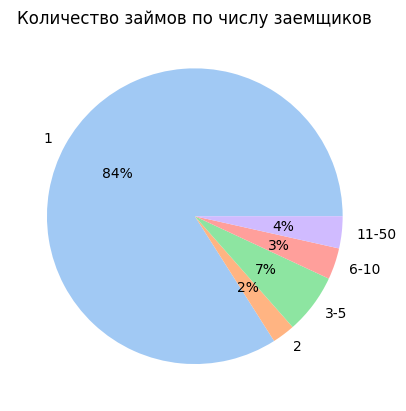

In [49]:
make_pie(count_bor['num'], count_bor['bor_gr'], 'Количество займов по числу заемщиков')

Чаще всего займ берет 1 человек - таких случаев - 84%

In [50]:
df['bor_gr'] = df['bor_gr'].astype('str')

Мы видим, что для женщин практически всегда средства собираются быстрее, чем для мужчин. При этом самые лучшие результаты у группы из женщин в количестве от 11 до 49.
В других случаях количесто людей в группе заемщиков не сильно влияет на сроки сборов средств. В группах, где присутствуют имужчины, и женщины, средства собираются по-разному. В группе 2-5 человек результатыблизки, к результатам женщин, в группе 11-49 человек результаты смешанных групп ближе к результатам у мужчин


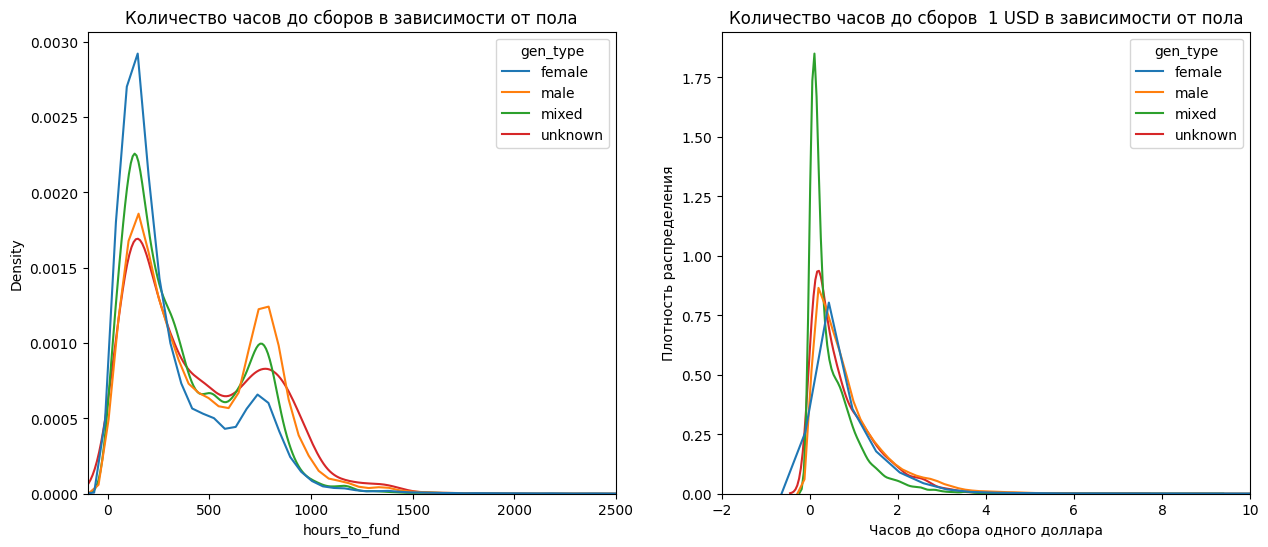

In [ ]:
paired_kde(df, 'gen_type', -100, 2500, -2, 10,'Количество часов до сборов в зависимости от пола', 'Количество часов до сборов  1 USD в зависимости от пола')

Мы видим, что вся сумма собирается быстрее когда заемщики женщины
А вот скорость набора одного доллара быстрее у смешанных групп.

Мы ранее видели, что есть достаточно весомая корредяция между признаками пола и страны (63%) а также пола и региона(80%)
Вероятно, в странах, гда заемщиками чаще являются женщины, суммы займа не слишком большие. Сами суммы набираются быстро, но скорость набора одного доллара не слишком быстрая.

В более богатых странах заемщиками чаще становятся не только женщины, суммы займа у них выше и, соответственно скорость набора доллара выше у смешанных групп.

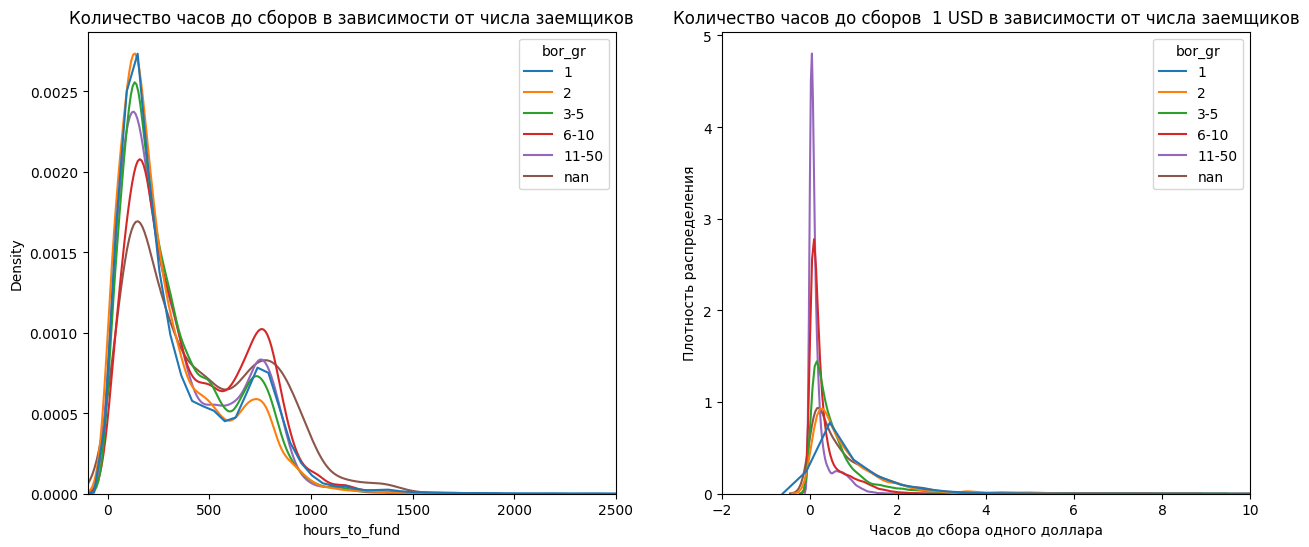

In [ ]:
paired_kde(df, 'bor_gr', -100, 2500, -2, 10, 'Количество часов до сборов в зависимости от числа заемщиков', 'Количество часов до сборов  1 USD в зависимости от числа заемщиков')

По числу заемщиков особенно показателен график скорости набора одного доллара. Мы видим, что у больших групп заемщиков один доллар набирается быстрее. Вероятно, это связано с суммой займа. Чем больше сумма тем больше число заемщиков, а это, в свою очередь влияет на большую скорость набора одного даллара.

Мы видим что рисунок распределения очень похож у всех групп, однако в первые дни видно, что женщины собирали средства быстрее смешанных групп, а смешанные группы - быстрее мужчин

### 3.6. Cвязь между предполагаемым временем возврата в месяцах  и сроками сборов средств

In [51]:
df['terms_month'] = pd.qcut(x=df['term_in_months'], q = 4).astype('str')

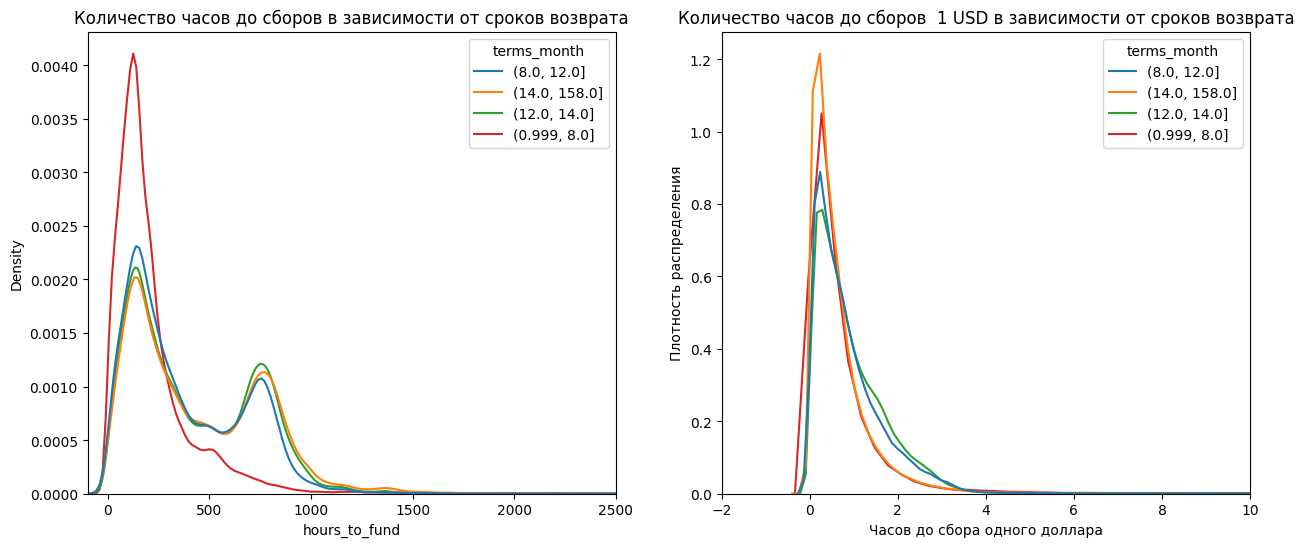

In [ ]:
paired_kde(df.query('days_to_fund <120'), 'terms_month', -100, 2500, -2, 10, 'Количество часов до сборов в зависимости от сроков возврата', 'Количество часов до сборов  1 USD в зависимости от сроков возврата')

Мы видим, что те заявки, по которым заемщики планируют совершить возврат не позднее 8 месяцев, собирают средства намного быстрее, чем все остальные.

При этом 1 доллар собирается быстрее у заявок с ожидаемым большим сроком возврата. В данном случае, вероятно, это происходит из-за того, что у больших сумм быстрее набирается один доллар. А большие суммы чаще возвращают через более длителный промежуток времени.

### 3.7. Cвязь между религией страны заемщиков и сроками сборов средств

In [52]:
count_relig = df.groupby('main_country_religion').agg({'id':'nunique'}).reset_index()

In [ ]:
count_relig.sort_values(by = 'id', ascending = False)

,main_country_religion,id
1,Christians,463343
5,Muslims,99881
0,Buddhists,37578
3,Hindus,11628
2,Folk Religions,9880
4,Jews,190
6,Unaffiliated,133


Чаще всего займ берут из христианских стран, на втором месте - Мусультмане, на третьем и четвертом - буддисту и индуисты

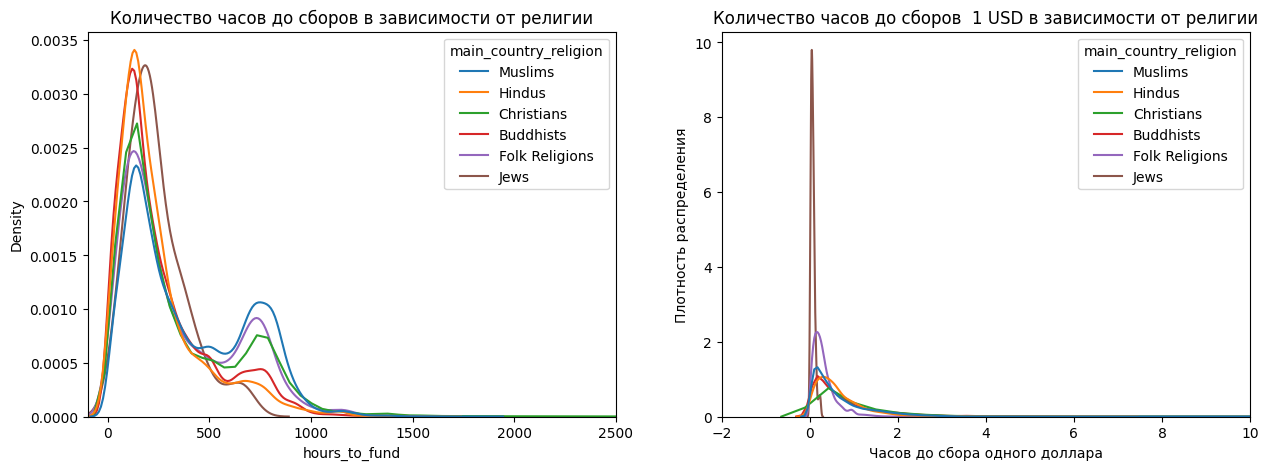

In [53]:
paired_kde(df.query('main_country_religion !="Unaffiliated"'), 'main_country_religion', -100, 2500, -2, 10, 'Количество часов до сборов в зависимости от религии', 'Количество часов до сборов  1 USD в зависимости от религии')

На графике мы видим, что в странах с индуизмом и буддизмом быстрее удается собрать средства, чем в других. Медленее других средства собираются в мусульманских странах.

Один доллар быстрее всего набирается в странах с иудаизмом, однако, таких займов очень мало. Так как в Израиле сумма займа скорее всего заметно выше и скорость набора одного доллара заметно быстрее, чем в других странах.

### 3.8.Связь между интервалами выплат и сроками сбора средств

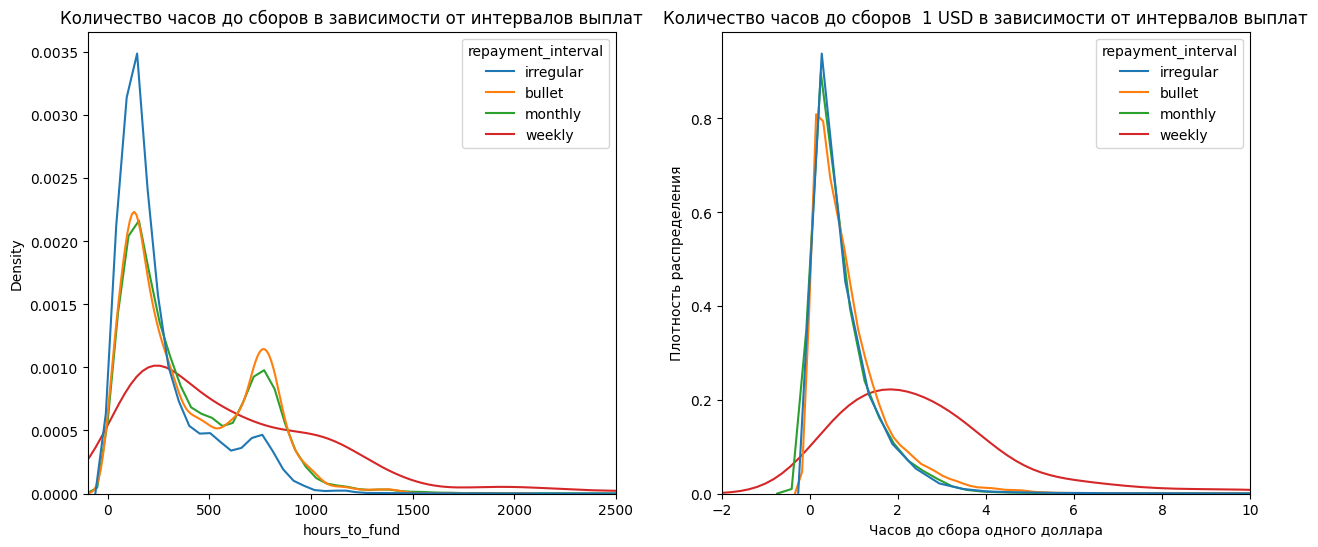

In [ ]:
paired_kde(df, 'repayment_interval', -100, 2500, -2, 10, 'Количество часов до сборов в зависимости от интервалов выплат', 'Количество часов до сборов  1 USD в зависимости от интервалов выплат')

Вы видим связь между заявленными интервалами выплат и сроками сбора средств. Однако, как ни странно, в случаях, когда заемщики обязуются выплачивать быстро и регулярно(еженедельно), деньги собираются дольше, чем в случаях, когда заемщики планируют выпоачивать нерегулярно.
Эта закономерность видна на обоих графиках.

При при ожидаемых нерегулярных возвратах чаще быстро набирается вся сумма, на скорость сборов одного доллара этотфактор не влияет.  

 Вероятно, такая неожиданя корреляция объясняется тем, что заемщики из самых бедных стран не могут гарантировать своевременные выплаты, но имено они вызывают большее срчувствие у доноров.


### 3.9. Взаимосвязь между страной или регионом этого государства, уровнем бедности и скоростью сборов средств

Для данной задачи мы воспоьзовались датасетом с сайта  world bank с разбивкой стран на регионы и категории бедности
https://data.worldbank.org/indicator/SI.POV.NAHC?end=2021&locations=CO&start=2019&view=chart&year_high_desc=true

In [54]:
df2 = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/778XV5e9GKLUpw')
df2.sample(3)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
224,SXM,Latin America & Caribbean,High income,NaN,Sint Maarten (Dutch part),NaN
141,LTE,NaN,NaN,Late-dividend countries are mostly upper middl...,Late-demographic dividend,NaN
83,GHA,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Ghana,NaN


In [55]:
list_country= list(df['country'].unique())
list_c1 = list(df2['TableName'])
b = []
for x in list_country:
  if x not in list_c1:
    b.append(x)
b

['Palestine',
 'Yemen',
 'The Democratic Republic of the Congo',
 'Turkey',
 'Kyrgyzstan',
 'Congo',
 'Saint Vincent and the Grenadines',
 "Lao People's Democratic Republic",
 'Myanmar (Burma)',
 'Egypt',
 "Cote D'Ivoire"]

In [56]:
df2['TableName'] = (
    df2['TableName']
    .str.replace('Yemen, Rep','Yemen', regex=False)
    .str.replace('Congo, Dem. Rep.','The Democratic Republic of the Congo', regex=False)
    .str.replace('Kyrgyz Republic','Kyrgyzstan', regex=False)
    .str.replace('Türkiye','Turkey', regex=False)
    .str.replace('Congo, Rep.','Congo', regex=False)
    .str.replace('Lao PDR',"Lao People's Democratic Republic", regex=False)
    .str.replace('Myanmar','Myanmar (Burma)', regex=False)
    .str.replace('Egypt, Arab Rep.','Egypt', regex=False)
    .str.replace("Côte d'Ivoire","Cote D'Ivoire", regex=False)
    .str.replace('Yemen, Rep.','Yemen', regex=False)
)

In [57]:
df_country = (df
              .merge(df2[['TableName', 'Region', 'IncomeGroup']],
              how = 'inner', left_on='country', right_on= 'TableName')
              .drop(columns = 'TableName')
)
df_country.sample()

,id,funded_amount,activity,sector,use,country_code,country,region,partner_id,posted_time,...,male_num,gen_type,borrowers_num,mpi_index,fund_am_group,lenders_num,bor_gr,terms_month,Region,IncomeGroup
418282,1288073,175.0,Retail,Retail,to buy a tricycle to transport goods and suppl...,CO,Colombia,Cereté,177,2017-04-27 16:10:41+00:00,...,1,male,1,0.019657,"(24.999, 250.0]","(0.999, 7.0]",1,"(8.0, 12.0]",Latin America & Caribbean,Upper middle income


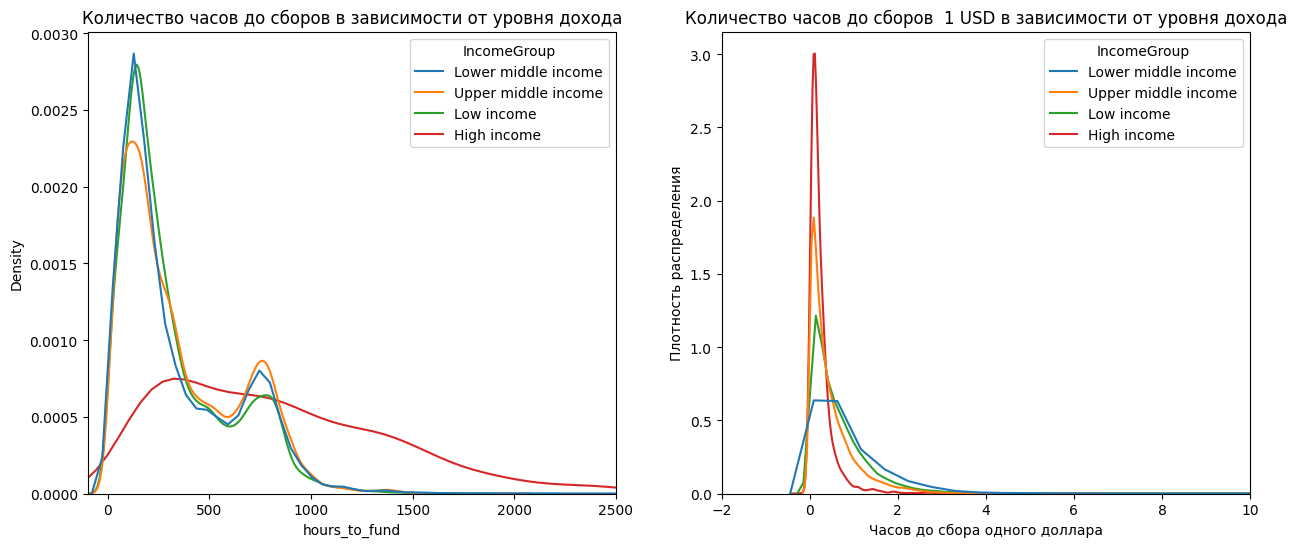

In [ ]:
paired_kde(df_country, 'IncomeGroup', -100, 2500, -2, 10, 'Количество часов до сборов в зависимости от уровня дохода', 'Количество часов до сборов  1 USD в зависимости от уровня дохода')

Эти графики демонстрируют полностью противоположную картину. Вся сумма набирается дольше для стран с высоким доходом и при этом один доллар набирается быстрее в странах с высоким доходом

In [58]:
list1 = list(df_country.query('IncomeGroup == "High income"')['country'].unique())
len1 = len(df_country.query('IncomeGroup == "High income"')['id'])

In [59]:
print(f"Страны с высоким уровнем дохода - это - {list1}, всего заявок из этих стран - {len1}")

Страны с высоким уровнем дохода - это - ['United States', 'Chile', 'Israel', 'Panama', 'Puerto Rico'], всего заявок из этих стран - 4307


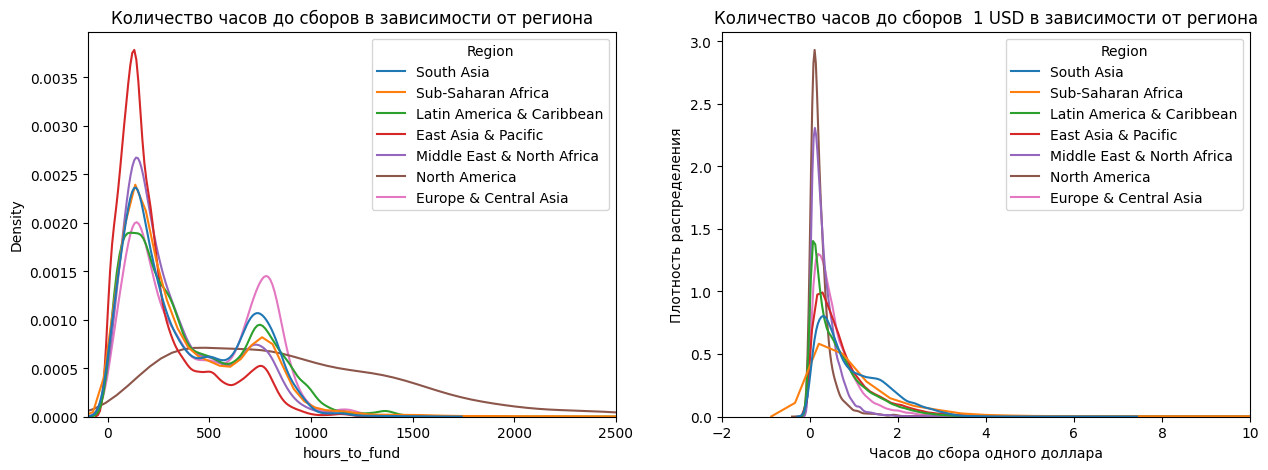

In [ ]:
paired_kde(df_country, 'Region', -100, 2500, -2, 10, 'Количество часов до сборов в зависимости от региона', 'Количество часов до сборов  1 USD в зависимости от региона')

График, иллюстрирующий скорость набора всей суммы, демонстрирует самую быструю скорость набора всей суммы для региона East Asia and Pasific

На графике со скоростью набора одного доллара мы видим самую большую скорость набора одного доллара в регоне Северная Америка

In [60]:
inc_group = df_country.groupby('IncomeGroup').agg({'id':'count'})

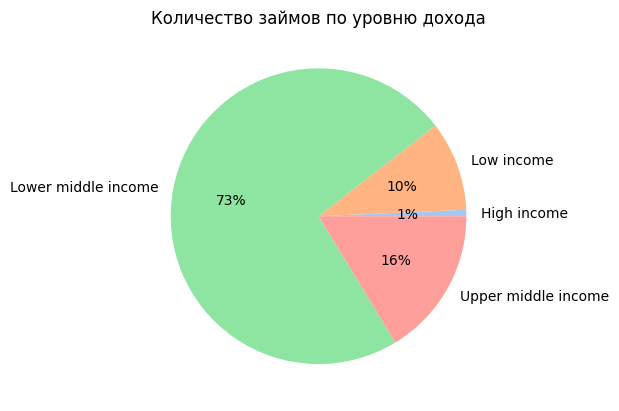

In [61]:
make_pie(inc_group['id'], inc_group.index,'Количество займов по уровню дохода')

In [62]:
df_country['poverty_group'] = pd.qcut(x=df['mpi_index'], q = 4, labels=['менеее бедные', 'не очень бедные', 'бедные', 'самые бедные'])

In [63]:
df_country['poverty_group'] = df_country['poverty_group'].astype('str')

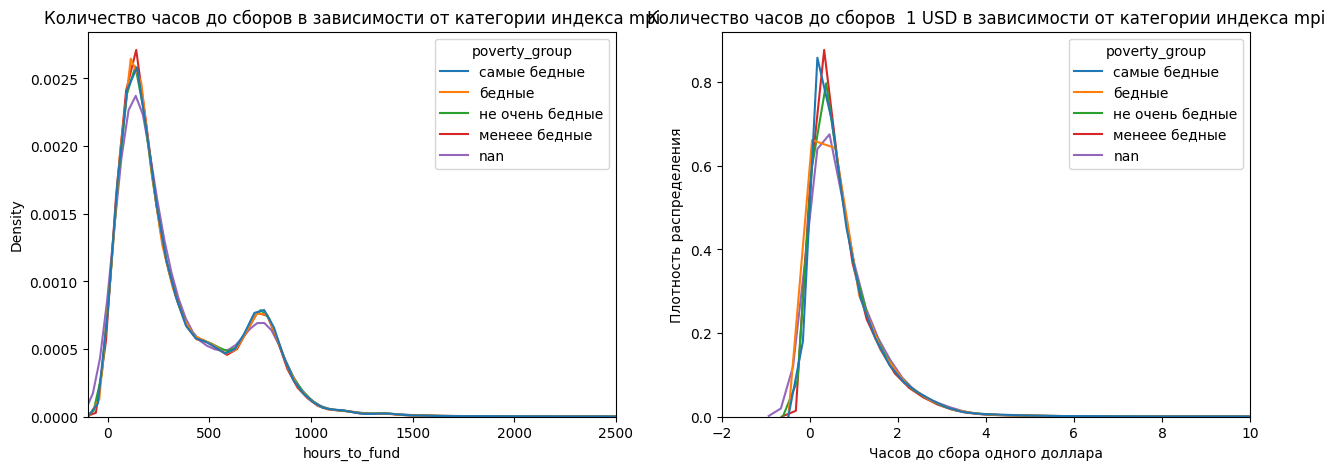

In [ ]:
paired_kde(df_country, 'poverty_group', -100, 2500, -2, 10, 'Количество часов до сборов в зависимости от категории индекса mpi', 'Количество часов до сборов  1 USD в зависимости от категории индекса mpi')

Индекс бедности не влияет на скорость сбора средств

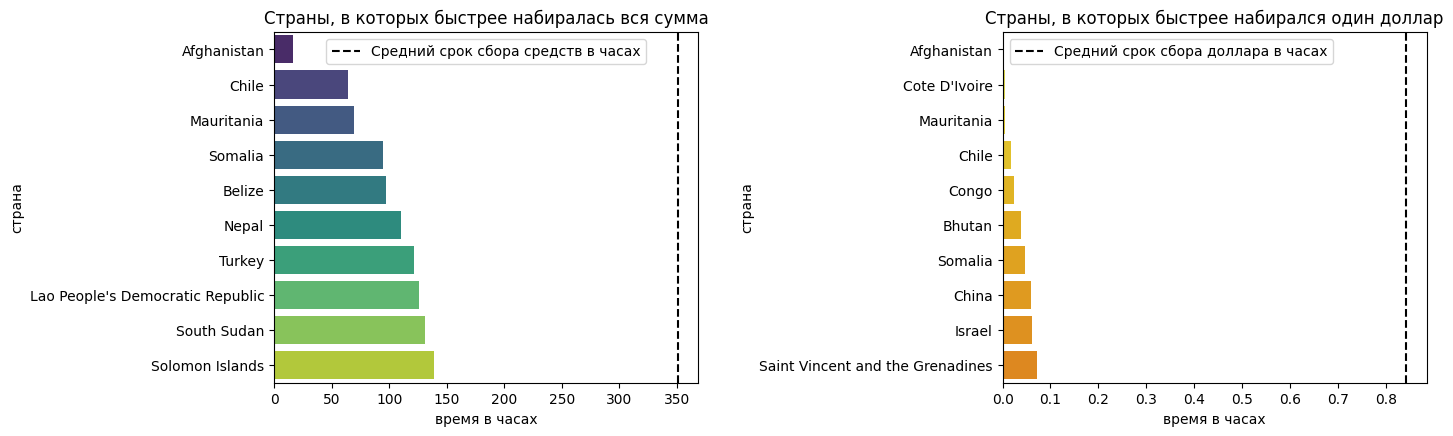

In [136]:
paired_barplot(df, 'country', 'страна', True, 'Страны, в которых быстрее набиралась вся сумма', 'Страны, в которых быстрее набирался один доллар')

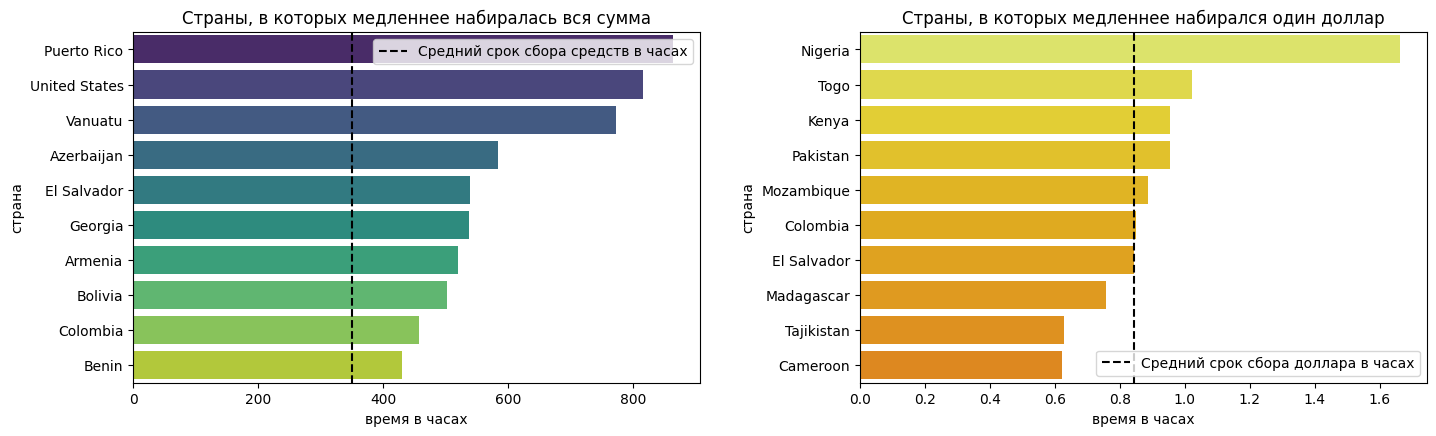

In [137]:
paired_barplot(df, 'country', 'страна', False, 'Страны, в которых медленнее набиралась вся сумма', 'Страны, в которых медленнее набирался один доллар')

Сравнивая графики, мы видим, что чаще вся сумма набиралась быстро в бедных странах (Мавритания, Сомали, Афганистан), а медленно в странах побогаче (США, Азербайджан, Грузия)

График сборов одного доллара не демонтрирует явной зависимости между уровнем жизни в стране и скостью сбора средств.

Независимо от того, что мы определяем под скоростью сборов средств мы видим очень быстрый набор средств в Афганистане, Чили, Мавритании

### 3.10 Проверим, как собирается один доллар в странах разного достатка

Мы  уже наблюдали обратную корреляцию между скоростью набора одного доллара и суммой заказа. Чем больше сумма, тем быстрее набрается один доллар.  У нас ранее была гипотеза, что такая зависимость может быть связана со страной заявки. Если доноры чаще жертвуют в заявки из своих стран, тогда у более богатых доноров один доллар будет собираться всегда быстрее.


Проверим, есть ли корреляцию между скоростью набора одного доллара и уровнем достатка страны.

Text(0.5, 1.0, 'Корреляции Phi-k между скоростью набора одного доллара, суммой заявки и уровнем достатка в стране')

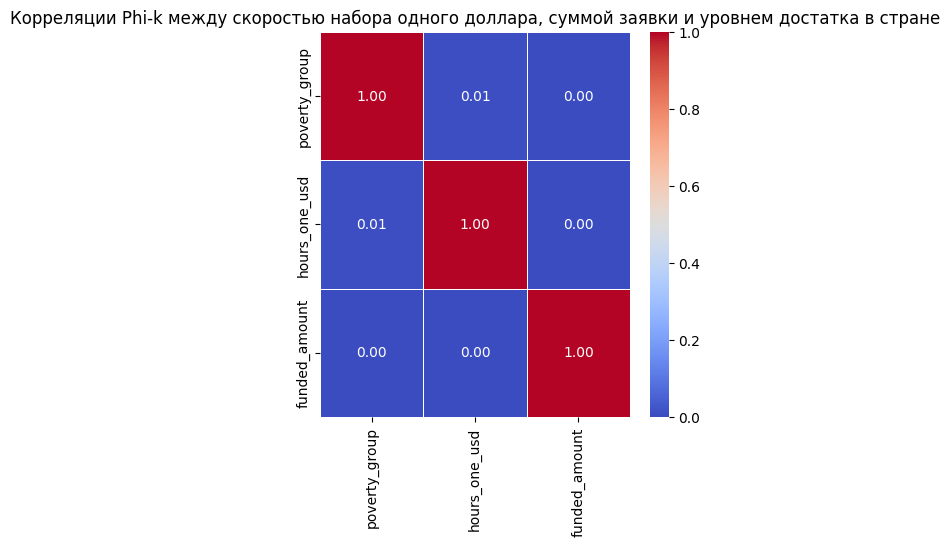

In [ ]:
phik_matrix = df_country[['poverty_group','hours_one_usd', 'funded_amount']].phik_matrix(interval_cols=['hours_one_usd', 'funded_amount'])
plt.figure(figsize=(5, 5))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляции Phi-k между скоростью набора одного доллара, суммой заявки и уровнем достатка в стране')

Интересно, что мы не видим зависимости между уровнем достатка в стране, суммой заявок (и в бедных, и в богатых странах, могут быть заявки на разные суммы). Мы также не видим корреляции между скоростью набора одного доллара и уровнем достатка в стране.

In [64]:
df_high = df_country.query('IncomeGroup == "High income"')
df_upper_middle = df_country.query('IncomeGroup == "Upper middle income"')
df_low_middle = df_country.query('IncomeGroup == "Lower middle income"')
df_low = df_country.query('IncomeGroup == "Low income"')

In [ ]:
paired_kde(df, 'fund_am_group', -100, 2500, -2, 10,'Количество часов до сборов в зависимости от суммы займа', 'Количество часов до сборов  1 USD в зависимости от суммы займа')

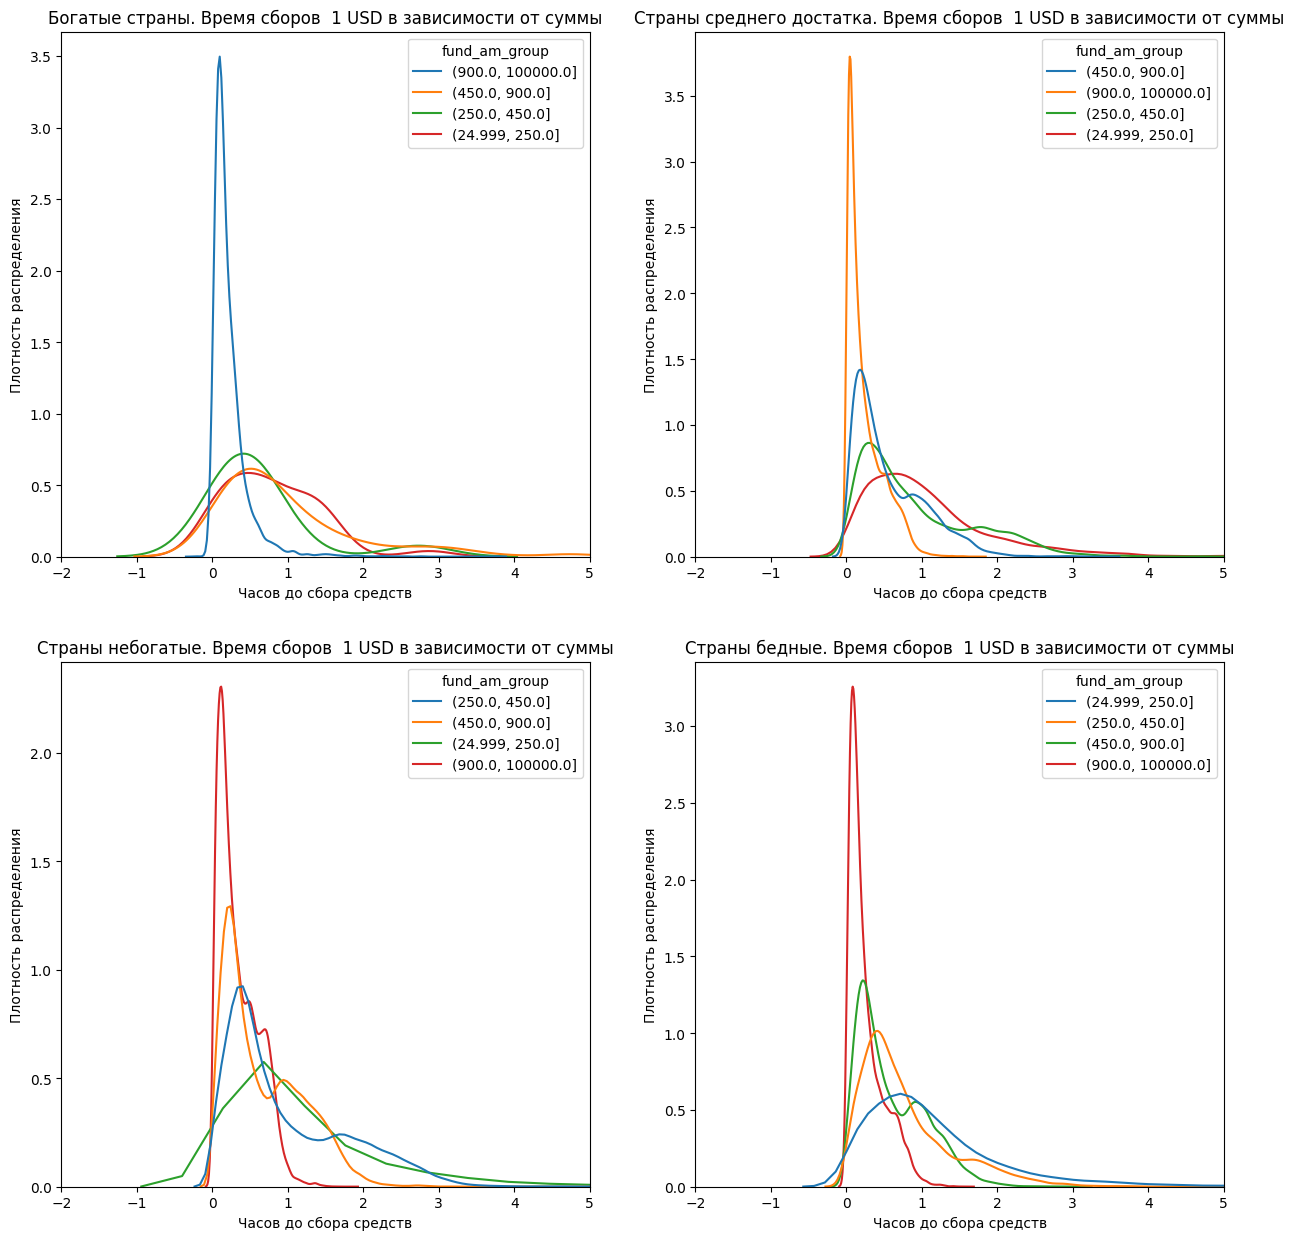

In [ ]:
plt.figure(figsize=(15, 15))
ax1 = plt.subplot(2, 2, 1)
sns.kdeplot(data = df_high, hue= 'fund_am_group', x = 'hours_one_usd', common_norm = False, ax=ax1).set(title='Богатые страны. Время сборов  1 USD в зависимости от суммы')
plt.ylabel("Плотность распределения")
plt.xlabel("Часов до сбора средств")
ax1.set_xlim(-2, 5)

ax2 = plt.subplot(2, 2, 2)
sns.kdeplot(data = df_upper_middle, hue= 'fund_am_group', x = 'hours_one_usd', common_norm = False, ax=ax2).set(title='Cтраны среднего достатка. Время сборов  1 USD в зависимости от суммы')
plt.ylabel("Плотность распределения")
plt.xlabel("Часов до сбора средств")
ax2.set_xlim(-2, 5)

ax3 = plt.subplot(2, 2, 3)
sns.kdeplot(data = df_low_middle, hue= 'fund_am_group', x = 'hours_one_usd', common_norm = False, ax=ax3).set(title='Cтраны небогатые. Время сборов  1 USD в зависимости от суммы')
plt.ylabel("Плотность распределения")
plt.xlabel("Часов до сбора средств")
ax3.set_xlim(-2, 5)

ax4 = plt.subplot(2, 2, 4)
sns.kdeplot(data = df_low, hue= 'fund_am_group', x = 'hours_one_usd', common_norm = False, ax=ax4).set(title='Cтраны бедные. Время сборов  1 USD в зависимости от суммы')
plt.ylabel("Плотность распределения")
plt.xlabel("Часов до сбора средств")
ax4.set_xlim(-2, 5)
plt.show()


Итак мы видим, что независимо отуровня достатка страны, один доллар всегда собирается быстрее в крупных суммах и медленне в небольших

## Проверка статистических гипотез

### 4.1 Функции для проверки статистических гипотез

**Проверка распределения на нормальность**

In [65]:
def test_normal(sample):
  alpha = 0.05
  results = st.shapiro(sample)
  p_value = results[1]
  if p_value < alpha:
    print(f" p-значение: {round(p_value,2)} . Распределение не нормально")
  else:
     print(f" p-значение: {round(p_value,2)}. Распределение нормально")

In [66]:
def ttest(sample1,sample2, num):
  alpha = 0.05
  results = st.ttest_ind(sample1, sample2 , equal_var = False)
  print('p-значение по t-test:', round(results.pvalue,3))
  print('средние значения sample1', sample1.mean())
  print('средние значения sample2', sample2.mean())
  if num == 2:
    if results.pvalue < alpha:
      print("Отвергаем нулевую гипотезу. Наблюдаем статистическое различие между двумя выборками.")
    else:
      print("Не получилось отвергнуть нулевую гипотезу. Не наблюдаем статистическое различие между двумя выборками")
  if num == 1:
    if results.pvalue/2 < alpha:
      print("Отвергаем нулевую гипотезу. Наблюдаем статистическое различие между двумя выборками.")
    else:
      print("Не получилось отвергнуть нулевую гипотезу. Не наблюдаем статистическое различие между двумя выборками")


In [67]:
def mwtest(sample1,sample2, num):
  alpha = 0.05
  results1 = st.mannwhitneyu(sample1, sample2)[1]
  print('p-значение, u-критерий Манна-Уитни:', results1)
  print('средние значения sample1', round(sample1.mean(),2))
  print('средние значения sample2', round(sample2.mean(),2))
  if num == 2:
    if results1 < alpha:
      print("Отвергаем нулевую гипотезу. Наблюдаем статистическое различие между двумя выборками.")
    else:
      print("Не получилось отвергнуть нулевую гипотезу. Не наблюдаем статистическое различие между двумя выборками.")
  if num == 1:
    if results1 < alpha:
      print("Отвергаем нулевую гипотезу. Наблюдаем статистическое различие между двумя выборками.")
    else:
      print("Не получилось отвергнуть нулевую гипотезу. Не наблюдаем статистическое различие между двумя выборками.")



### 4.2 Гипотеза 1

**Тест на зависимость сроков сборов средств от суммы займа**

H0: Средний срок сбора одного доллара  не отличается для займов с суммой больше 900 долларов и меньше 900 долларов

H1: Средний срок сбора одного доллара  для займов с суммой больше 900 долларов и меньше 900 долларов отличается  и при этом скорость займа одного доллара у больших сумм происходит быстрее

In [68]:
sample1= df.query('funded_amount > 900')['hours_one_usd'].sample(5000)
sample2= df.query('funded_amount < 900')['hours_one_usd'].sample(5000)

In [69]:
test_normal(sample1)

 p-значение: 0.0 . Распределение не нормально


In [70]:
test_normal(sample2)

 p-значение: 0.0 . Распределение не нормально


Оба распределения не нормальны, более корректным будетиспользовать критерий Манна-Уитни

In [71]:
mwtest(sample1,sample2, 1)

p-значение, u-критерий Манна-Уитни: 0.0
средние значения sample1 0.29
средние значения sample2 1.03
Отвергаем нулевую гипотезу. Наблюдаем статистическое различие между двумя выборками.


### 4.2 Гипотеза 2

H0: Средний срок сбора средств не отличается для займов женщин и всех остальных

H1: Средний срок сбора средств отличается для займов лиц женского пола от всех остальных

In [72]:
sample1= df.query('gen_type == "female"')['hours_to_fund'].sample(5000)
sample2= df.query('gen_type != "female"')['hours_to_fund'].sample(5000)

In [73]:
test_normal(sample1)

 p-значение: 0.0 . Распределение не нормально


In [74]:
test_normal(sample2)

 p-значение: 0.0 . Распределение не нормально


In [75]:
mwtest(sample1,sample2, 2)

p-значение, u-критерий Манна-Уитни: 2.5269341320041294e-85
средние значения sample1 329.98
средние значения sample2 433.97
Отвергаем нулевую гипотезу. Наблюдаем статистическое различие между двумя выборками.


### 4.3 Гипотеза 3

H0: Средний срок сбора одного доллара не отличается для займов смешанных групп по полу и для всех остальных

H1: Средний срок сбора средств отличается для займов смешанных групп по полу и для всех остальных. При этом у смешанных групп деньги собираются быстрее.


In [76]:
sample1= df.query('gen_type == "mixed"')['hours_one_usd'].sample(5000)
sample2= df.query('gen_type != "mixed"')['hours_one_usd'].sample(5000)

In [77]:
test_normal(sample1)

 p-значение: 0.0 . Распределение не нормально


In [78]:
test_normal(sample2)

 p-значение: 0.0 . Распределение не нормально


In [79]:
mwtest(sample1,sample2, 1)

p-значение, u-критерий Манна-Уитни: 5.407180030505678e-156
средние значения sample1 0.51
средние значения sample2 0.88
Отвергаем нулевую гипотезу. Наблюдаем статистическое различие между двумя выборками.


 Итак, средний срок сбора средств отличается для займов смешанных групп по полу и для всех остальных. При этом у смешанных групп деньги собираются быстрее.

### 4.4 Гипотеза 4

H0: Средний срок сбора средств не отличается для займов, категории секторов которых относятся к Arts, Education, Manufacturing  и всех остальных

H1:  Средний срок сбора средств  отличается для займов, категории секторов которых относятся к Arts, Education, Manufacturing  и всех остальных и при этом деньги собираются быстрее

In [81]:
lists = ['Arts', 'Education', 'Manufacturing']
sample1= df.query('sector in @lists')['hours_to_fund'].sample(5000)
sample2= df.query('sector not in @lists')['hours_to_fund'].sample(5000)

In [ ]:
test_normal(sample1)

 p-значение: 0.0 . Распределение не нормально


In [ ]:
test_normal(sample2)

 p-значение: 0.0 . Распределение не нормально


In [ ]:
mwtest(sample1,sample2, 1)

p-значение, u-критерий Манна-Уитни: 2.9425714663825626e-115
средние значения sample1 219.3
средние значения sample2 358.36
Отвергаем нулевую гипотезу. Наблюдаем статистическое различие между двумя выборками.


Гипотза о том, что средний срок сбора средств отличается для займов, категории секторов которых относятся к Arts, Education, Manufacturing и всех остальных и при этом деньги собираются быстрее

### 4.5 Гипотеза 5

H0: Средний срок сбора одного доллара не отличается для займов, категории секторов которых относятся к Arts, Education, Manufacturing и всех остальных

H1: Средний срок сбора одного доллара отличается для займов, категории секторов которых относятся к Arts, Education, Manufacturing и всех остальных и при этом деньги собираются быстрее

In [ ]:
sample1= df.query('sector in @lists')['hours_one_usd'].sample(5000)
sample2= df.query('sector not in @lists')['hours_one_usd'].sample(5000)

In [ ]:
test_normal(sample1)

 p-значение: 0.0 . Распределение не нормально


In [ ]:
test_normal(sample2)

 p-значение: 0.0 . Распределение не нормально


In [ ]:
mwtest(sample1,sample2, 1)

p-значение, u-критерий Манна-Уитни: 5.075140880064794e-224
средние значения sample1 0.43
средние значения sample2 0.87
Отвергаем нулевую гипотезу. Наблюдаем статистическое различие между двумя выборками.


Гипотза о том, что средний срок сбора одного доллара отличается для займов, категории секторов которых относятся к Arts, Education, Manufacturing и всех остальных и при этом деньги собираются быстрее

### 4.6 Гипотеза 6

H0: Средний срок сбора средств не отличается для займов, графики выплат которых относятся к категории 'weekly'  и всех остальных

H1: Средний срок сбора средств отличается для займов, графики выплат которых относятся к категории 'weekly'  и всех остальных и при этом деньги собираются медленнее

In [95]:
sample1= df.query('repayment_interval == "weekly"')['hours_to_fund']
sample2= df.query('repayment_interval != "weekly"')['hours_to_fund'].sample(3000)

In [96]:
test_normal(sample1)

 p-значение: 0.0 . Распределение не нормально


In [97]:
test_normal(sample2)

 p-значение: 0.0 . Распределение не нормально


In [99]:
mwtest(sample1,sample2, 1)

p-значение, u-критерий Манна-Уитни: 6.95208484433645e-40
средние значения sample1 630.03
средние значения sample2 352.3
Отвергаем нулевую гипотезу. Наблюдаем статистическое различие между двумя выборками.


### 4.7 Гипотеза 7

H0: Средний срок сбора средств не отличается для займов из богатых стран и всех остальных.

H1: Средний срок сбора средств  отличается для займов из богатых стран и всех остальных, и при этом время сбора заявок из богатых стран  дольше

In [143]:
sample1= df_country.query('IncomeGroup == "High income"')['hours_to_fund'].sample(3000)
sample2= df_country.query('IncomeGroup != "High income"')['hours_to_fund'].sample(3000)

In [144]:
test_normal(sample1)

 p-значение: 0.0 . Распределение не нормально


In [145]:
test_normal(sample2)

 p-значение: 0.0 . Распределение не нормально


In [146]:
mwtest(sample1,sample2, 1)

p-значение, u-критерий Манна-Уитни: 0.0
средние значения sample1 882.4
средние значения sample2 344.39
Отвергаем нулевую гипотезу. Наблюдаем статистическое различие между двумя выборками.


### 4.7 Гипотеза 8

H0: Средний срок сбора одного доллара не отличается для займов из богатых стран и всех остальных.

H1: Средний срок сбора одного доллара  отличается для займов из богатых стран и всех остальных и при этом в богатых странах один доллар собирается быстрее

In [147]:
sample1= df_country.query('IncomeGroup == "High income"')['hours_one_usd'].sample(3000)
sample2= df_country.query('IncomeGroup != "High income"')['hours_one_usd'].sample(3000)

In [148]:
test_normal(sample1)

 p-значение: 0.0 . Распределение не нормально


In [149]:
test_normal(sample2)

 p-значение: 0.0 . Распределение не нормально


In [150]:
mwtest(sample1,sample2, 1)

p-значение, u-критерий Манна-Уитни: 7.814536900835818e-293
средние значения sample1 0.25
средние значения sample2 0.9
Отвергаем нулевую гипотезу. Наблюдаем статистическое различие между двумя выборками.


#### Результаты статистических тестов:

* Средний срок сбора одного доллара для займов с суммой больше 900 долларов и меньше 900 долларов отличается и при этом скорость займа одного доллара у больших сумм происходит быстрее

* Средний срок сбора средств отличается для займов лиц женского пола от всех остальных

* Средний срок сбора средств отличается для займов смешанных групп по полу и для всех остальных. При этом у смешанных групп деньги собираются быстрее.

* Средний срок сбора средств отличается для займов, категории секторов которых относятся к Arts, Education, Manufacturing и всех остальных и при этом деньги собираются быстрее

* Средний срок сбора одного доллара отличается для займов, категории секторов которых относятся к Arts, Education, Manufacturing и всех остальных и при этом деньги собираются быстрее

* Средний срок сбора средств отличается для займов, графики выплат которых относятся к категории 'weekly' и всех остальных и при этом деньги собираются медленнее

* Средний срок сбора средств отличается для займов из богатых стран и всех остальных, и при этом время сбора заявок из богатых стран дольше

* Средний срок сбора одного доллара отличается для займов из богатых стран и всех остальных и при этом в богатых странах один доллар собирается быстрее




## Выводы



Выводы о предобработке данных можно найти выше, в завершени раздела о предобработке данных.

Итак, мы рассчитали время, которое было затрачено на сбор средств по каждой заявке.

Чаще всего от публикации на сайте до полного сбора средств проходит от 5 до 22 дней. Медиана - 9 дней. Есть отрицательные значения (деньги были собраны до публикации на сайте). Есть аномально долгие периоды сбора средств (до 420 дней)


Следует отметить, что существует два подхода к оценке скорости сбора средств. Мы можем сравнивать заявки по скорости сбора всей суммы, или же по скорости сбора одного доллара.

Мы обнаружили, что большие суммы часто собираются дольше. И, одновременно, один доллар в больших суммах часто собирался быстрее, чем в небольших суммах займа.

Ниже мы укажем основные факторы, которые влияют на скорость сбора средств, а такде на скорость сбора одного доллара.



**Мы определили факторы, которые могут повлиять на скорость сбора средств:**




1.
* Часто сбор средств на небольшие суммы проходит быстрее, нежели на большие суммы займа.
* Время сборов одного доллара, наоборот, обычно происходит быстрее в заявках на крупную суму, нежели в заявках на небольшую сумму


2.
* Количество доноров растет вместе со сроками выплат
* У заявок с быстрой скоростью набора одного доллара число доноров обычно больше.


3.
* Сектора, по которым часто быстрее удается собрать средства - искусство, образование и производство. Дольше всего сборы средств происходят в секторе транспорт и одежда
* Сектора, по которым быстрее удавалось собрать один доллар - искусство, образование и производство. Дольше всего средства собирались в секторах транспорт и личные нужды


4.
* Виды займов, по которым быстрее собирается вся сумма это  печтворк, книжный переплет, ткачество, вязание (скорее всего все эти займы на небольшую сумму). Медленнее всего средства собирались на проекты в ландшафтном дизайне, технологии и коммуникаций (вероятно - дорогие проекты)
* Виды займов, по которым быстрее собирается один доллар - это гораздо более глобальные проекты, такие как уход за пожилыми людьми, помощь детям, услуги образования. Вероятно, это более глобальные проекты на большие суммы, которые привлекают большее количество людей. Медленнее всего средства собирались на проекты таких тематик, как энергетика, одежда и косметика.



5.  
* Мы видим, что для женщин всегда средства собираются быстрее, чем для мужчин.
* Если же анализировать скорость набора одного доллара, намного быстрее деньги собираются для смешанных групп.


6.  

* Мы видим, что те заявки, по которым заемщики планируют совершить возврат не позднее 8 месяцев, собирают средства намного быстрее, чем все остальные
* Один доллар собирается быстрее,  наоборот,  в заявках с ожидаемым сроком возврата более 14 месяцев



7.  
* Часто быстрее всего собирают деньги для заявок из стран, с основной религией - буддизм, индуизм и иудаизм. Дольше времени собирают деньги на заявки из мусульманских стран



8.  
* Скорость сбора средств, а также скорость набора одного доллара не зависят от mpi индекса.


9.  
* Скорость сбора одного доллара быстрее у групп с большим числом заемщиков (вероятно, более масштабные проекты)

10.
* Средства на заявки из стран с высоким уровнем дохода чаще собираются дольше
* Один доллар, наоборот, быстрее собирается  именно в странах с высоким уровнем дохода

11.
* Быстрее всего средства собирались для региона East Asia and Pacific. Это страны 'Philippines', 'Cambodia', 'Vietnam', 'Mongolia', 'Timor-Leste','Indonesia', 'Samoa', 'Thailand', 'Vanuatu', "Lao People's Democratic Republic", 'Solomon Islands', 'China'
* Один доллар быстрее всего собирался в ркгионе Северная Америка и Северная Африка


В целом, можно сделать предположение, что вся сумма набиралась быстрее в случаях, когда заемщиками были женщины из бедных стран, и назначением займа были небольшие задачи, такие как ткачество или вязание.

один доллар набирался бысрее для более масштабных проектов, таких как организация ухода за пожилыми людьми или детьми. Заемщиками чаще становились смешанные группы. Такие проекты привлекали внимание большего числа доноров и суммы займа были значительно выше.